# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings(action='ignore')


In [3]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('R:\\Upgrad\\Main_Course\\Case Study\\NYC_Taxi\\Starter-Notebook-EDA-NYC-Taxi\\Starter Notebook - EDA NYC Taxi\\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_temp = pd.read_parquet(file_path) # df_temp : Creating a temporary dataframe to load each file
        #Adding Month, Day and Hour Column from Pickup time
        df_temp['Month'] = df_temp.tpep_pickup_datetime.dt.month 
        df_temp['Day'] = df_temp.tpep_pickup_datetime.dt.day
        df_temp['Hour'] = df_temp.tpep_pickup_datetime.dt.hour
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
      
        sampled_data = pd.DataFrame()
        ## Get Unique values for days
        days_list = df_temp['Day'].unique()
        # Loop through dates and then loop through every hour of each date
        for day_value in days_list:
            day_data=pd.DataFrame()
            day_data = df_temp[df_temp['Day']==day_value]
            hours = day_data['Hour'].unique()
            # Iterate through each hour of the selected date
            for hour in hours:
                    hour_data = day_data[day_data['Hour']==hour]
                # Sample .75% of the hourly data randomly
                    sample = hour_data.sample(frac = 0.0075, random_state = 42) # Sampling done to achieve vaue in between 250K-300K
                # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample])
                    
        # Concatenate the sampled data of all the dates to a single dataframe
        df =pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Error reading file sampled_taxi_data.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('sampled_taxi_data.parquet')
df.to_csv('sampled_taxi_data.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [11]:
# Load the new data file
# data_txi is the data frame for loading the sampled file.
data_taxi = pd.read_csv('sampled_taxi_data.csv')


In [17]:
data_taxi.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0        3703         2  2023-01-01 00:31:50   2023-01-01 00:44:17   
1        4166         2  2023-01-01 00:10:50   2023-01-01 00:24:12   
2        3847         2  2023-01-01 00:25:37   2023-01-01 00:34:52   
3        1882         2  2023-01-01 00:27:26   2023-01-01 00:52:20   
4     2995366         2  2023-01-01 00:59:15   2023-01-01 01:23:15   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              2.0           2.85         1.0                  N   
1              4.0           1.32         1.0                  N   
2              1.0           3.17         1.0                  N   
3              2.0           3.80         1.0                  N   
4              NaN           7.97         NaN                NaN   

   PULocationID  DOLocationID  ...  tip_amount  tolls_amount  \
0           263            41  ...        4.12           0.0   
1            90           137  ...        3.56           0.0   
2            79           141  ...        3.98           0.0   
3           142           107  ...        0.00           0.0   
4           140            17  ...        8.17           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         24.72                   2.5          0.0   
1                    1.0         21.36                   2.5          0.0   
2                    1.0         23.88                   2.5          0.0   
3                    1.0         29.70                   2.5          0.0   
4                    1.0         49.00                   NaN          NaN   

   Month  Day  Hour  Airport_fee  
0      1    1     0          NaN  
1      1    1     0          NaN  
2      1    1     0          NaN  
3      1    1     0          NaN  
4      1    1     0          NaN  

[5 rows x 24 columns]

In [19]:
data_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286610 entries, 0 to 286609
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             286610 non-null  int64  
 1   VendorID               286610 non-null  int64  
 2   tpep_pickup_datetime   286610 non-null  object 
 3   tpep_dropoff_datetime  286610 non-null  object 
 4   passenger_count        277121 non-null  float64
 5   trip_distance          286610 non-null  float64
 6   RatecodeID             277121 non-null  float64
 7   store_and_fwd_flag     277121 non-null  object 
 8   PULocationID           286610 non-null  int64  
 9   DOLocationID           286610 non-null  int64  
 10  payment_type           286610 non-null  int64  
 11  fare_amount            286610 non-null  float64
 12  extra                  286610 non-null  float64
 13  mta_tax                286610 non-null  float64
 14  tip_amount             286610 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [21]:
# Fix the index and drop any columns that are not needed
data_taxi.reset_index(inplace = True) # Fixing the index
data_taxi = data_taxi.drop('Unnamed: 0',axis=1) # Droppong the column Unamed : 0 as the column does not add value
data_taxi.reset_index(inplace = True) # Fixing the index after dropping the column


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [23]:
# Combine the two airport fee columns
data_taxi['Airport_fee'] = data_taxi['Airport_fee'].fillna(data_taxi['airport_fee']) ## Fill the Missing Airport Fee with values from another column
data_taxi = data_taxi.drop('airport_fee',axis=1) ## Drop one column

In [25]:
data_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286610 entries, 0 to 286609
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   level_0                286610 non-null  int64  
 1   index                  286610 non-null  int64  
 2   VendorID               286610 non-null  int64  
 3   tpep_pickup_datetime   286610 non-null  object 
 4   tpep_dropoff_datetime  286610 non-null  object 
 5   passenger_count        277121 non-null  float64
 6   trip_distance          286610 non-null  float64
 7   RatecodeID             277121 non-null  float64
 8   store_and_fwd_flag     277121 non-null  object 
 9   PULocationID           286610 non-null  int64  
 10  DOLocationID           286610 non-null  int64  
 11  payment_type           286610 non-null  int64  
 12  fare_amount            286610 non-null  float64
 13  extra                  286610 non-null  float64
 14  mta_tax                286610 non-nu

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [54]:
# check where values of fare amount are negative : There is no fare amount with negatove amount but total amount is negative
data_taxi.describe().min()
data_negative_fare=data_taxi[data_taxi['total_amount']<0]  ## Creating a dataset with only negative fare amount to analyse the data further

In [52]:
data_taxi.describe().min()

level_0                  0.000000
index                    0.000000
VendorID                 0.447613
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               1.000000
PULocationID             1.000000
DOLocationID             1.000000
payment_type             0.000000
fare_amount              0.000000
extra                   -2.500000
mta_tax                 -0.500000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge   -1.000000
total_amount            -4.000000
congestion_surcharge    -2.500000
Month                    1.000000
Day                      1.000000
Hour                     0.000000
Airport_fee             -1.750000
dtype: float64

Did you notice something different in the `RatecodeID` column for above records?

In [56]:
# Analyse RatecodeID for the negative fare amounts
data_negative_fare['RatecodeID']

51337     2.0
54081     1.0
68533     2.0
98587     1.0
102887    1.0
144385    2.0
148115    2.0
150484    2.0
197059    1.0
219912    1.0
233468    1.0
Name: RatecodeID, dtype: float64

In [58]:
# Find which columns have negative values
data_taxi.describe().min()


level_0                  0.000000
index                    0.000000
VendorID                 0.447613
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               1.000000
PULocationID             1.000000
DOLocationID             1.000000
payment_type             0.000000
fare_amount              0.000000
extra                   -2.500000
mta_tax                 -0.500000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge   -1.000000
total_amount            -4.000000
congestion_surcharge    -2.500000
Month                    1.000000
Day                      1.000000
Hour                     0.000000
Airport_fee             -1.750000
dtype: float64

In [60]:
# fix these negative values
data_taxi['extra'] = data_taxi['extra'].abs()
data_taxi['mta_tax'] = data_taxi['mta_tax'].abs()
data_taxi['improvement_surcharge'] = data_taxi['improvement_surcharge'].abs()
data_taxi['total_amount'] = data_taxi['total_amount'].abs()
data_taxi['congestion_surcharge'] = data_taxi['congestion_surcharge'].abs()
data_taxi['Airport_fee'] = data_taxi['Airport_fee'].abs()


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [62]:
# Find the proportion of missing values in each column
percent_missing = data_taxi.isnull().sum() * 100 / len(data_taxi) # Deriving the percentage of missing values for each columns
percent_missing

level_0                  0.000000
index                    0.000000
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.310771
trip_distance            0.000000
RatecodeID               3.310771
store_and_fwd_flag       3.310771
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.310771
Month                    0.000000
Day                      0.000000
Hour                     0.000000
Airport_fee              3.310771
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [72]:
data_taxi =data_taxi[~data_taxi['store_and_fwd_flag'].isnull()]

In [68]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
## Filling Blank and Passenger count with 0 as 1
data_taxi['passenger_count'] = data_taxi['passenger_count'].apply(lambda x:1 if x==0 else x)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [66]:
# Fix missing values in 'RatecodeID'
data_taxi['RatecodeID'].value_counts()
#99 is not correct value, so replacing it with maximum occuring value
data_taxi['RatecodeID'] = data_taxi['RatecodeID'].apply(lambda x: 1 if x==99 else x)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [78]:
# handle null values in congestion_surcharge
data_taxi =data_taxi[~data_taxi['congestion_surcharge'].isnull()]

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [90]:
# Handle any remaining missing values - All the columns handled by removing null values for one column as all had same rows with null value.
data_taxi.isnull().sum()


index                    0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Month                    0
Day                      0
Hour                     0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [92]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
data_taxi.describe()


index       VendorID  passenger_count  trip_distance  \
count  277121.000000  277121.000000    277121.000000  277121.000000   
mean   143403.753151       1.736743         1.383674       3.439333   
std     82648.001241       0.440401         0.876006       4.528700   
min         0.000000       1.000000         1.000000       0.000000   
25%     71825.000000       1.000000         1.000000       1.060000   
50%    143682.000000       2.000000         1.000000       1.790000   
75%    214890.000000       2.000000         1.000000       3.370000   
max    286609.000000       2.000000         9.000000     187.350000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  277121.000000  277121.000000  277121.000000  277121.000000   
mean        1.074036     165.391641     164.168053       1.204802   
std         0.392564      63.756634      69.774212       0.465206   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000     132.000000     113.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max         5.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  277121.000000  277121.000000  277121.000000  277121.000000   
mean       19.731574       1.636226       0.495427       3.573980   
std        18.300007       1.830659       0.047686       4.074351   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.860000   
75%        21.900000       2.500000       0.500000       4.450000   
max       910.000000      14.250000       0.800000     150.290000   

        tolls_amount  improvement_surcharge   total_amount          Month  \
count  277121.000000          277121.000000  277121.000000  277121.000000   
mean        0.592644               0.999345      28.851590       6.512062   
std         2.175116               0.023660      22.903291       3.461670   
min         0.000000               0.000000       0.000000       1.000000   
25%         0.000000               1.000000      15.960000       4.000000   
50%         0.000000               1.000000      21.000000       6.000000   
75%         0.000000               1.000000      30.700000      10.000000   
max       143.000000               1.000000     911.000000      12.000000   

                 Day           Hour    Airport_fee  
count  277121.000000  277121.000000  277121.000000  
mean       15.505714      14.298198       0.142468  
std         8.701667       5.775648       0.463917  
min         1.000000       0.000000       0.000000  
25%         8.000000      11.000000       0.000000  
50%        15.000000      15.000000       0.000000  
75%        23.000000      19.000000       0.000000  
max        31.000000      23.000000       1.750000

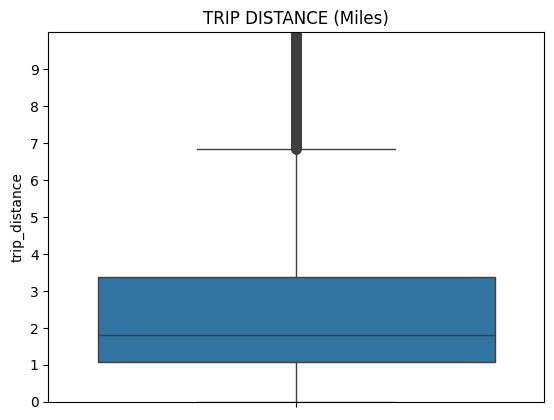

In [98]:
sns.boxplot(data_taxi['trip_distance'])
plt.ylim(0, 10)
plt.title("TRIP DISTANCE (Miles)")
plt.yticks(np.arange(0, 10, 1))
plt.show()

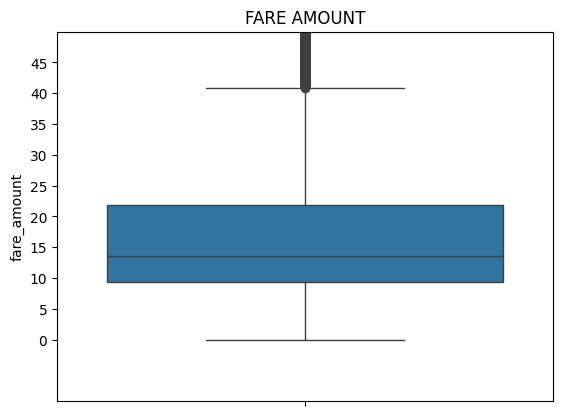

In [100]:
sns.boxplot(data_taxi['fare_amount'])
plt.ylim(-10, 50)
plt.title("FARE AMOUNT")
plt.yticks(np.arange(0, 50, 5))
plt.show()

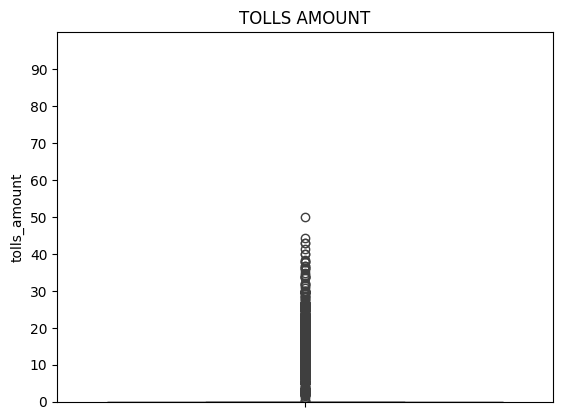

In [102]:
sns.boxplot(data_taxi['tolls_amount'])
plt.ylim(0, 100)
plt.title("TOLLS AMOUNT")
plt.yticks(np.arange(0,100,10))
plt.show()

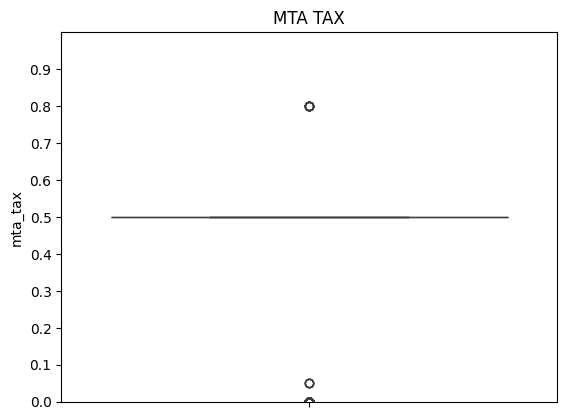

In [108]:
sns.boxplot(data_taxi['mta_tax'])
plt.ylim(0, 1)
plt.title("MTA TAX")
plt.yticks(np.arange(0, 1, .1))
plt.show()

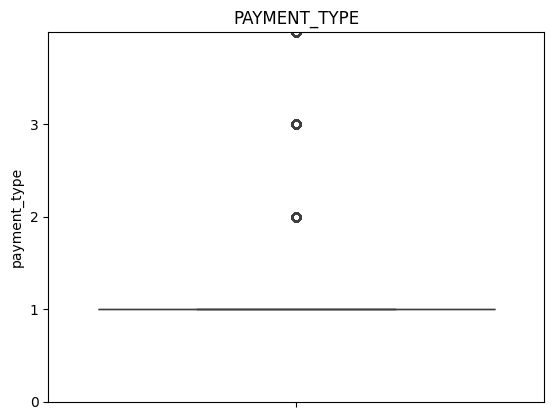

In [112]:
sns.boxplot(data_taxi['payment_type'])
plt.ylim(0, 4)
plt.title("PAYMENT_TYPE")
plt.yticks(np.arange(0, 4, 1))
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [94]:
# remove passenger_count > 6
data_taxi = data_taxi[data_taxi['passenger_count']<=6]

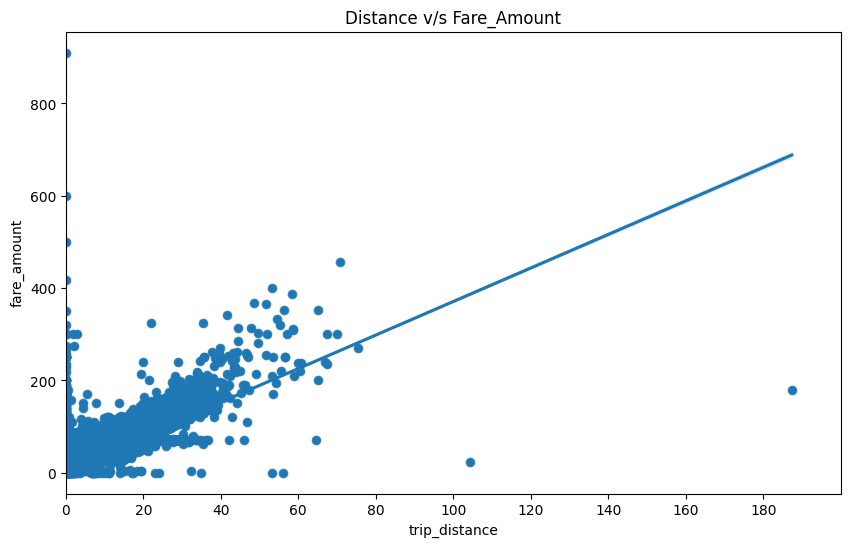

In [116]:
# Continue with outlier handling
## Plotting Scatter plot Distance v/s amount
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_taxi['trip_distance'],y=data_taxi['fare_amount'])
sns.regplot(x=data_taxi['trip_distance'],y=data_taxi['fare_amount'])
plt.xlim(0, 200)
plt.title("Distance v/s Fare_Amount")
plt.xticks(np.arange(0, 200, 20))
plt.show()


In [120]:
#### Remove data which have distance less than 1 but fare >100 and ratecodeid is not negotiated fare(5)
data_taxi = data_taxi[~((data_taxi['trip_distance']<1) & (data_taxi['fare_amount']>100) & (data_taxi['RatecodeID']!=5))]

In [122]:
## Very less data with Distance over 100 : count =1
data_taxi =data_taxi[data_taxi['trip_distance']<100]

In [126]:
#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones) ## Removed
data_remove = data_taxi[(data_taxi['fare_amount']==0) & (data_taxi['trip_distance']==0)] ## data subset where fare and distance is 0
data_to_remove=data_remove[data_remove['PULocationID']!=data_remove['DOLocationID']] ## Checking drop and pick location
index_to_remove = data_to_remove.index # Fetching the index of data where dropis not equal to pickup
data_taxi= data_taxi.drop(index_to_remove) # removing data

In [128]:
data_taxi= data_taxi.reset_index()

In [130]:
# Do any columns need standardising?
## Check if drop time is less than pick up time and swap the values
row_ind=data_taxi[data_taxi['tpep_dropoff_datetime']<data_taxi['tpep_pickup_datetime']].index
data_taxi.loc[row_ind,['tpep_pickup_datetime','tpep_dropoff_datetime']]=data_taxi.loc[row_ind,['tpep_dropoff_datetime','tpep_pickup_datetime']].to_numpy()


In [132]:
### Converting pick and drop timestamp to timestamp and extracting trip duration in minutes
data_taxi['tpep_dropoff_datetime'] = pd.to_datetime(data_taxi['tpep_dropoff_datetime'], errors='coerce')
data_taxi['tpep_pickup_datetime'] = pd.to_datetime(data_taxi['tpep_pickup_datetime'], errors='coerce')
data_taxi['trip_duration_in_minutes'] = round((data_taxi['tpep_dropoff_datetime']-data_taxi['tpep_pickup_datetime']).dt.total_seconds() / 60,2)

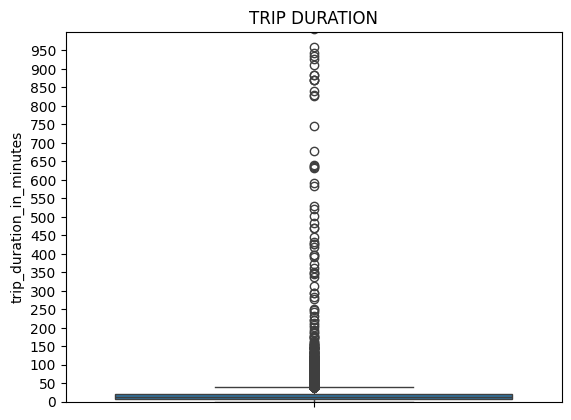

In [134]:
sns.boxplot(data_taxi['trip_duration_in_minutes'])
plt.ylim(0, 1000)
plt.title("TRIP DURATION")
plt.yticks(np.arange(0,1000, 50))
plt.show()

In [166]:
data_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276829 entries, 0 to 276828
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   index                     276829 non-null  int64         
 1   VendorID                  276829 non-null  int64         
 2   tpep_pickup_datetime      276829 non-null  datetime64[ns]
 3   tpep_dropoff_datetime     276829 non-null  datetime64[ns]
 4   passenger_count           276829 non-null  float64       
 5   trip_distance             276829 non-null  float64       
 6   RatecodeID                276829 non-null  float64       
 7   store_and_fwd_flag        276829 non-null  object        
 8   PULocationID              276829 non-null  int64         
 9   DOLocationID              276829 non-null  int64         
 10  payment_type              276829 non-null  int64         
 11  fare_amount               276829 non-null  float64       
 12  ex

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [168]:
data_taxi.columns.tolist()

['index',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Month',
 'Day',
 'Hour',
 'Airport_fee',
 'trip_duration_in_minutes']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Categorical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` - Numerical
* `extra` - Numerical
* `mta_tax` - Numerical
* `tip_amount` - Numerical
* `tolls_amount` - Numerical
* `improvement_surcharge` -Numerical
* `total_amount` -Numerical
* `congestion_surcharge` -Numerical
* `airport_fee` -Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [173]:
data_taxi['Day_of_Pickup'] =  data_taxi.tpep_pickup_datetime.dt.day_name()
data_taxi['Day_of_Drop'] =  data_taxi.tpep_dropoff_datetime.dt.day_name
data_taxi['Month_of_Pickup'] =  data_taxi.tpep_pickup_datetime.dt.month_name()

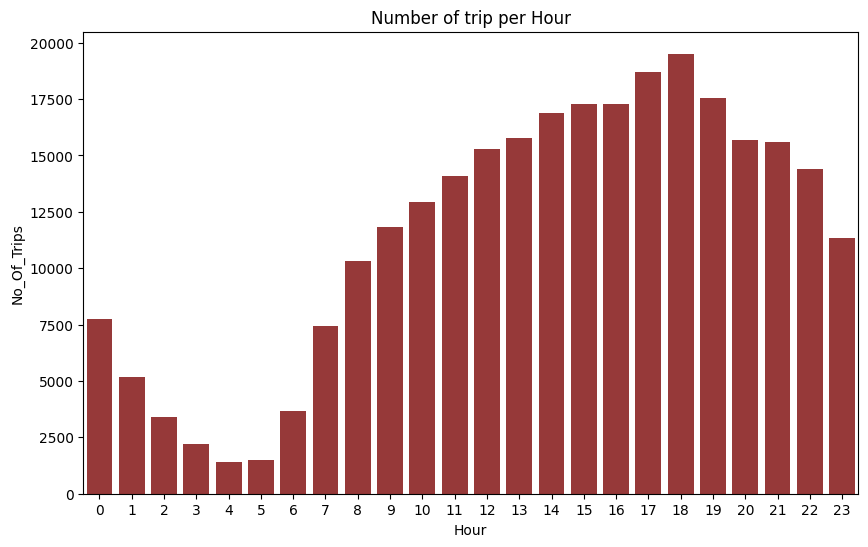

In [273]:
# Find and show the hourly trends in taxi pickups
data_hour= data_taxi.groupby('Hour').size().reset_index(name='No_Of_Trips')
plt.figure(figsize=(10,6))
sns.barplot(x='Hour',y= 'No_Of_Trips',data =data_hour,color='Brown')
plt.title('Number of trip per Hour')
plt.show()

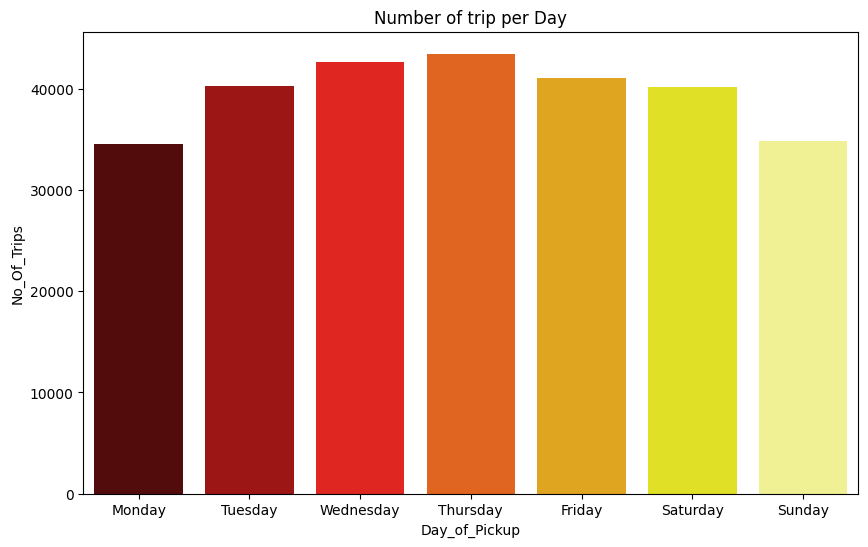

In [251]:
# Find and show the daily trends in taxi pickups (days of the week)

daily_data= data_taxi.groupby('Day_of_Pickup').size().reset_index(name='No_Of_Trips')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_data['Day_of_Pickup'] = pd.Categorical(daily_data['Day_of_Pickup'], categories=day_order, ordered=True)
daily_data_sorted = daily_data.sort_values('Day_of_Pickup')
plt.figure(figsize=(10,6))
sns.barplot(x='Day_of_Pickup',y= 'No_Of_Trips',data =daily_data_sorted,palette='hot')
plt.title('Number of trip per Day')
plt.show()


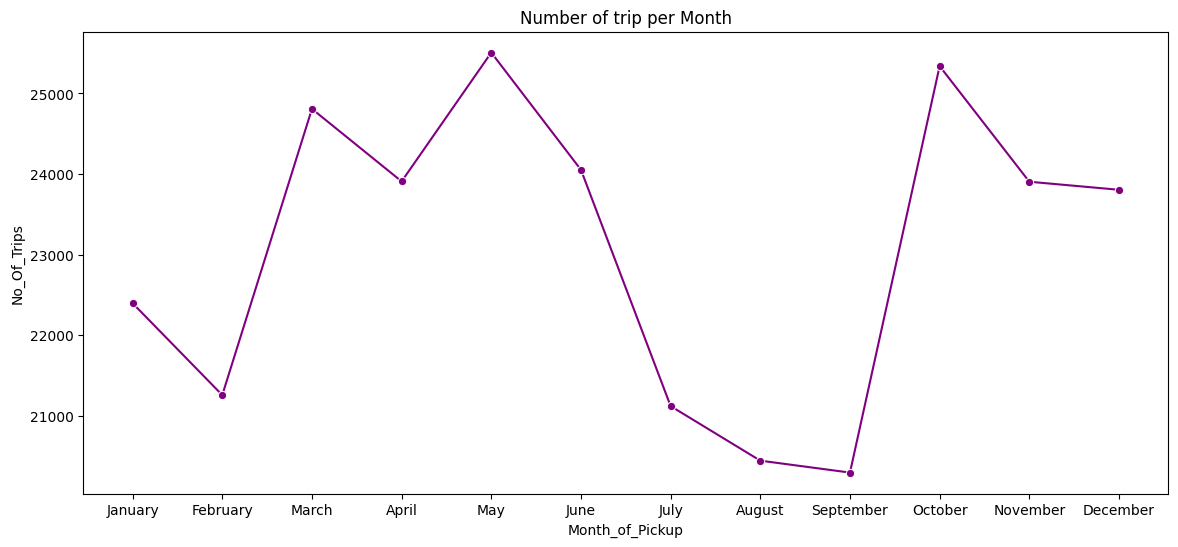

In [279]:
# Show the monthly trends in pickups
Monthly_data= data_taxi.groupby('Month_of_Pickup').size().reset_index(name='No_Of_Trips')
Month_Order = ['January','February','March', 'April','May','June', 'July', 'August', 'September','October', 'November', 'December']
Monthly_data['Month_of_Pickup'] = pd.Categorical(Monthly_data['Month_of_Pickup'], categories=Month_Order, ordered=True)
Monthly_data_sorted = Monthly_data.sort_values('Month_of_Pickup')
plt.figure(figsize=(14,6))
sns.lineplot(x='Month_of_Pickup',y= 'No_Of_Trips',data =Monthly_data_sorted,marker="o",color='purple')
plt.title('Number of trip per Month')
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [287]:
# Analyse the above parameters
data_taxi['fare_amount'].describe()


count    276829.000000
mean         19.728453
std          18.283608
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max         910.000000
Name: fare_amount, dtype: float64

In [327]:
data_taxi['tip_amount'].value_counts()

tip_amount
0.00     61855
2.00     14064
1.00     10994
3.00      7299
5.00      4308
         ...  
24.55        1
24.45        1
30.73        1
19.38        1
33.34        1
Name: count, Length: 2602, dtype: int64

In [291]:
data_taxi['total_amount'].describe()


count    276829.000000
mean         28.851433
std          22.893081
min           0.000000
25%          15.960000
50%          21.000000
75%          30.700000
max         911.000000
Name: total_amount, dtype: float64

In [293]:
data_taxi['trip_distance'].describe()

count    276829.000000
mean          3.440026
std           4.512252
min           0.000000
25%           1.060000
50%           1.790000
75%           3.370000
max          75.500000
Name: trip_distance, dtype: float64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [305]:
# Create a df with non zero entries for the selected parameters. Tips can be zero so leaving the data with tips =0
data_taxi_amount_non_zero = data_taxi[~(data_taxi['fare_amount'] ==0)]
data_taxi_amount_non_zero = data_taxi_amount_non_zero[~(data_taxi_amount_non_zero['total_amount'] ==0)]


In [321]:
# Removing data which has distance = 0 but zones are not same.
data_distance_non_zero=data_taxi_amount_non_zero[~((data_taxi_amount_non_zero["trip_distance"]==0) & (data_taxi_amount_non_zero["PULocationID"]!=data_taxi_amount_non_zero["DOLocationID"]))]

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
22          27         1  2023-01-01 00:45:06   2023-01-01 00:54:06   
48          55         2  2023-01-01 01:34:06   2023-01-01 01:34:14   
65          74         1  2023-01-01 01:25:41   2023-01-01 01:25:45   
71          80         1  2023-01-01 01:26:38   2023-01-01 01:27:12   
72          81         2  2023-01-01 01:20:00   2023-01-01 01:20:02   
...        ...       ...                  ...                   ...   
276606  286378         1  2023-01-27 20:15:41   2023-01-27 20:16:16   
276786  286565         1  2023-03-30 17:29:43   2023-03-30 17:30:04   
276815  286596         2  2023-06-30 22:36:31   2023-06-30 22:36:34   
276819  286600         2  2023-11-30 12:01:23   2023-11-30 12:01:50   
276824  286605         2  2023-03-30 13:11:06   2023-03-30 13:11:28   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
22                  1.0            0.0         1.0                  N   
48                  2.0            0.0         5.0                  N   
65                  1.0            0.0         1.0                  N   
71                  1.0            0.0         5.0                  N   
72                  4.0            0.0         5.0                  N   
...                 ...            ...         ...                ...   
276606              1.0            0.0         5.0                  N   
276786              2.0            0.0         1.0                  N   
276815              2.0            0.0         5.0                  N   
276819              2.0            0.0         5.0                  N   
276824              1.0            0.0         1.0                  N   

        PULocationID  DOLocationID  ...  total_amount  congestion_surcharge  \
22                48            48  ...         13.60                   2.5   
48               265           265  ...         61.20                   0.0   
65               148           148  ...         60.00                   2.5   
71               229           229  ...          6.00                   0.0   
72               264           264  ...         46.80                   0.0   
...              ...           ...  ...           ...                   ...   
276606           265           265  ...         89.75                   0.0   
276786           145           145  ...          7.00                   0.0   
276815           228           228  ...         46.51                   0.0   
276819             1             1  ...        111.00                   0.0   
276824           193           193  ...          4.50                   0.0   

        Month  Day  Hour  Airport_fee  trip_duration_in_minutes  \
22          1    1     0          0.0                      9.00   
48          1    1     1          0.0                      0.13   
65          1    1     1          0.0                      0.07   
71          1    1     1          0.0                      0.57   
72          1    1     1          0.0                      0.03   
...       ...  ...   ...          ...                       ...   
276606      1   27    20          0.0                      0.58   
276786      3   30    17          0.0                      0.35   
276815      6   30    22          0.0                      0.05   
276819     11   30    12          0.0                      0.45   
276824      3   30    13          0.0                      0.37   

        Day_of_Pickup                                        Day_of_Drop  \
22             Sunday  <bound method PandasDelegate._add_delegate_acc...   
48             Sunday  <bound method PandasDelegate._add_delegate_acc...   
65             Sunday  <bound method PandasDelegate._add_delegate_acc...   
71             Sunday  <bound method PandasDelegate._add_delegate_acc...   
72             Sunday  <bound method PandasDelegate._add_delegate_acc...   
...               ...                                                

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

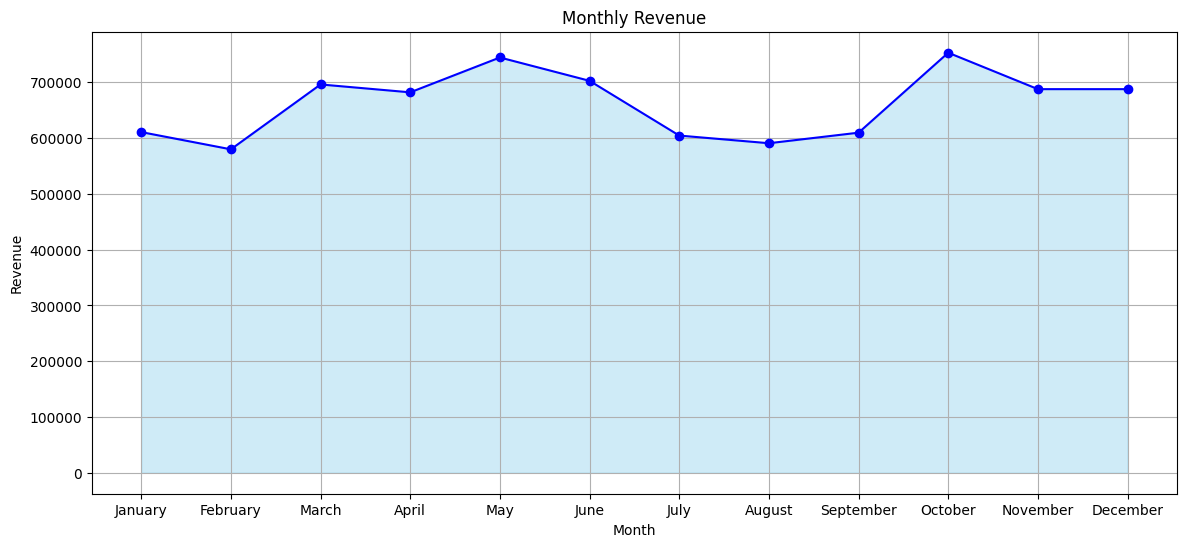

In [349]:
# Group data by month and analyse monthly revenue
df_revenue_month=data_distance_non_zero.groupby('Month_of_Pickup')['total_amount'].sum().reset_index()
df_revenue_month['Month_of_Pickup'] = pd.Categorical(df_revenue_month['Month_of_Pickup'], categories=Month_Order, ordered=True)
df_revenue_month = df_revenue_month.sort_values('Month_of_Pickup')
plt.figure(figsize=(14,6))
plt.fill_between(df_revenue_month['Month_of_Pickup'],df_revenue_month['total_amount'], color='skyblue', alpha=0.4)
plt.plot(df_revenue_month['Month_of_Pickup'], df_revenue_month['total_amount'], marker='o', color='blue')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [351]:
# Calculate proportion of each quarter
data_distance_non_zero['Drop_Quarter'] = data_distance_non_zero.tpep_pickup_datetime.dt.quarter # Add column Qaurter to the dataset


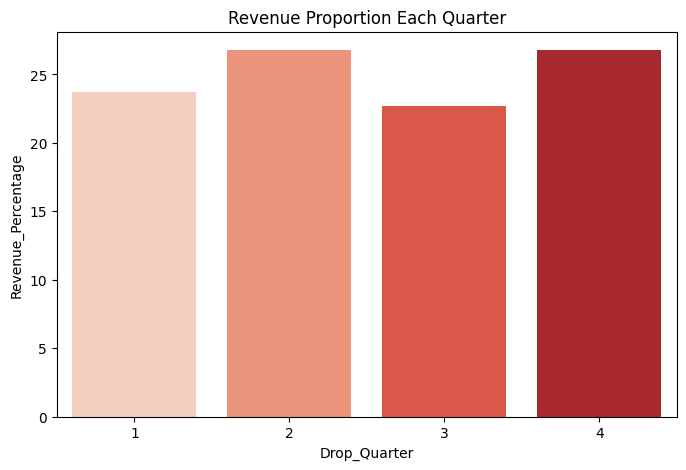

In [367]:
df_revenue_quarter=data_distance_non_zero.groupby('Drop_Quarter')['total_amount'].sum().reset_index()
## calculating total revenue
total_revenue = df_revenue_quarter['total_amount'].sum()
#calculating revenue percentage
df_revenue_quarter['Revenue_Percentage'] = (df_revenue_quarter['total_amount'] / total_revenue) * 100
#Plotting the revenue v/s quarter
plt.figure(figsize=(8, 5))
sns.barplot(data=df_revenue_quarter, x='Drop_Quarter', y='Revenue_Percentage', palette='Reds')
plt.title("Revenue Proportion Each Quarter")
plt.show()

In [365]:
df_revenue_quarter

Drop_Quarter  total_amount  Revenue_Percentage
0             1    1887083.74           23.734251
1             2    2129572.19           26.784079
2             3    1805337.69           22.706113
3             4    2128894.60           26.775557

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [369]:
data_non_zero = data_distance_non_zero[data_distance_non_zero['trip_distance']!=0] ## Removing all records hich has distnace =0

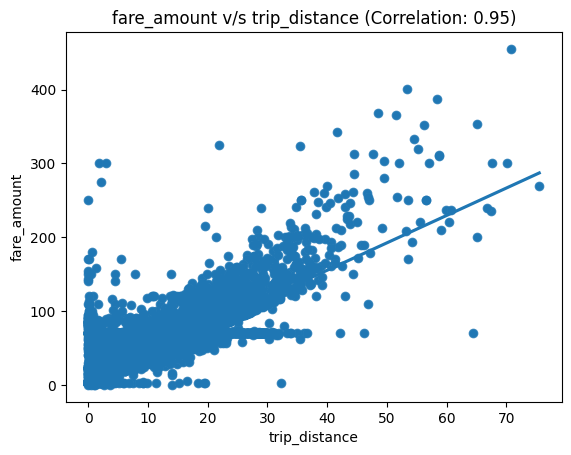

In [371]:
# Show how trip fare is affected by distance
corr_dist_fare = data_non_zero['fare_amount'].corr(data_non_zero['trip_distance'])
sns.scatterplot(x=data_non_zero['trip_distance'],y=data_non_zero['fare_amount'])
sns.regplot(x=data_non_zero['trip_distance'],y=data_non_zero['fare_amount'])
plt.title(f'fare_amount v/s trip_distance (Correlation: {corr_dist_fare:.2f})')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

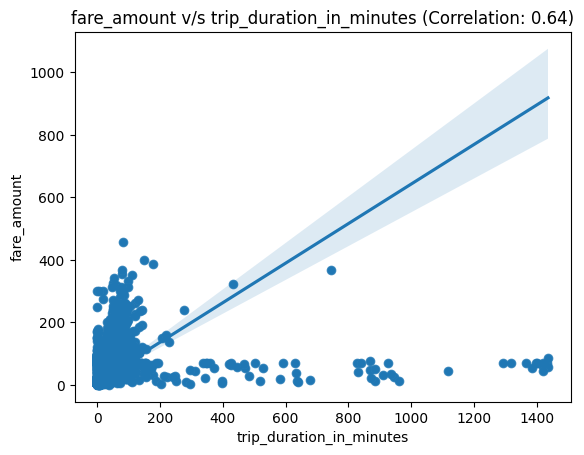

In [373]:
# Show relationship between fare and trip duration
corr_duration_fare = data_non_zero['fare_amount'].corr(data_non_zero['trip_duration_in_minutes'])
sns.scatterplot(x=data_non_zero['trip_duration_in_minutes'],y=data_non_zero['fare_amount'])
sns.regplot(x=data_non_zero['trip_duration_in_minutes'],y=data_non_zero['fare_amount'])
plt.title(f'fare_amount v/s trip_duration_in_minutes (Correlation: {corr_duration_fare:.2f})')
plt.show()

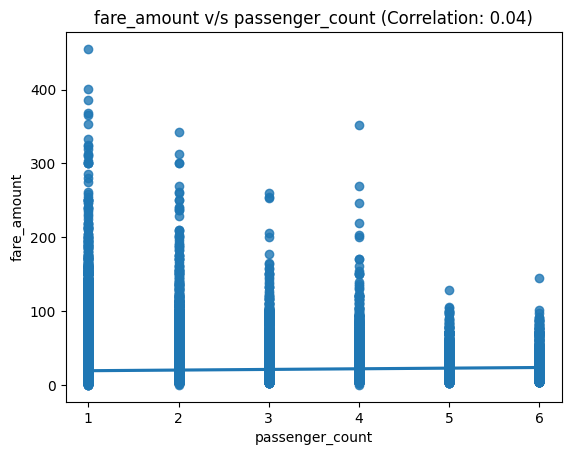

In [381]:
# Show relationship between fare and number of passengers
corr_passenger_count_fare = data_non_zero['fare_amount'].corr(data_non_zero['passenger_count'])
#sns.boxplot(x=data_non_zero['passenger_count'],y=data_non_zero['fare_amount'])
sns.regplot(x=data_non_zero['passenger_count'],y=data_non_zero['fare_amount'])
plt.title(f'fare_amount v/s passenger_count (Correlation: {corr_passenger_count_fare:.2f})')
plt.show()


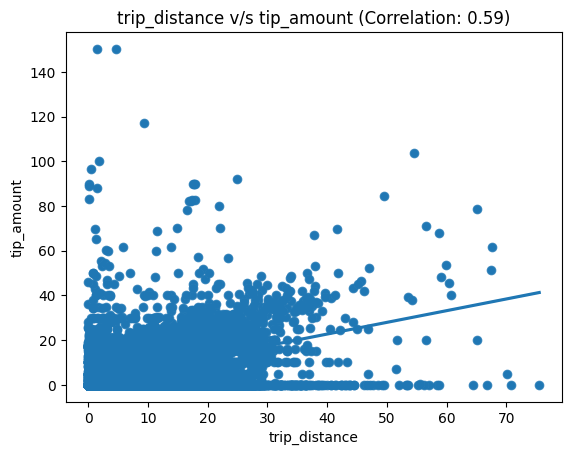

In [383]:
# Show relationship between tip and trip distance
corr_tip_distance = data_non_zero['trip_distance'].corr(data_non_zero['tip_amount'])
sns.scatterplot(x=data_non_zero['trip_distance'],y=data_non_zero['tip_amount'])
sns.regplot(x=data_non_zero['trip_distance'],y=data_non_zero['tip_amount'])
plt.title(f'trip_distance v/s tip_amount (Correlation: {corr_tip_distance:.2f})')
plt.show()


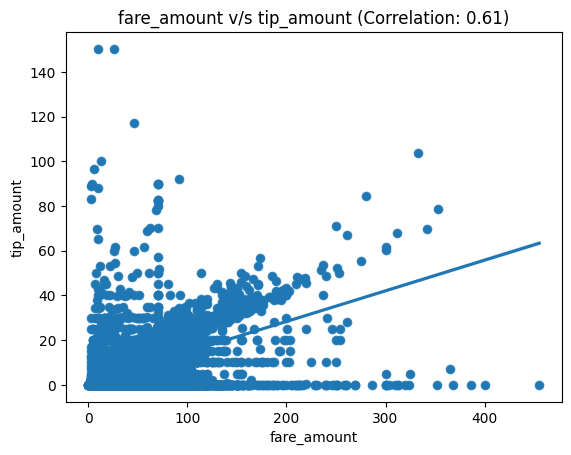

In [389]:
# Show relationship between tip and fare_amount
corr_tip_fare = data_non_zero['fare_amount'].corr(data_non_zero['tip_amount'])
sns.scatterplot(x=data_non_zero['fare_amount'],y=data_non_zero['tip_amount'])
sns.regplot(x=data_non_zero['fare_amount'],y=data_non_zero['tip_amount'])
plt.title(f'fare_amount v/s tip_amount (Correlation: {corr_tip_fare:.2f})')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

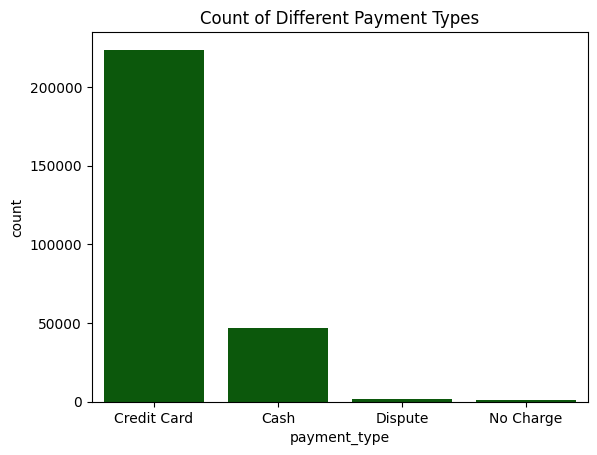

In [409]:
# Analyse the distribution of different payment types (payment_type).

payment_labels = {1: "Credit Card",2: "Cash",3: "No Charge", 4: "Dispute"}
data_non_zero["payment_type"]=data_non_zero["payment_type"].map(payment_labels) # mapping the values to display the payment types
sns.countplot(x=data_non_zero["payment_type"],color='darkgreen')
plt.title('Count of Different Payment Types')
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [411]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [1013]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

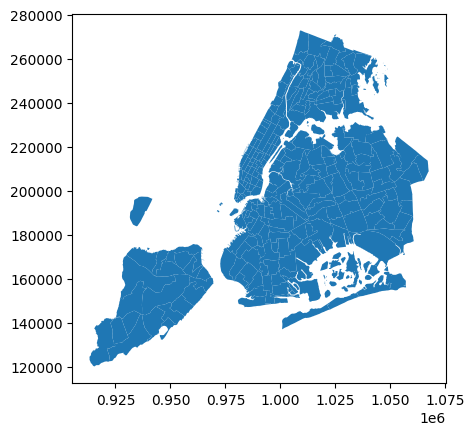

In [427]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [1015]:
# Merge zones and trip records using locationID and PULocationID
merged_data = pd.merge(data_non_zero,zones,left_on='PULocationID',right_on='LocationID')


In [1017]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271069 entries, 0 to 271068
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   index                     271069 non-null  int64         
 1   VendorID                  271069 non-null  int64         
 2   tpep_pickup_datetime      271069 non-null  datetime64[ns]
 3   tpep_dropoff_datetime     271069 non-null  datetime64[ns]
 4   passenger_count           271069 non-null  float64       
 5   trip_distance             271069 non-null  float64       
 6   RatecodeID                271069 non-null  float64       
 7   store_and_fwd_flag        271069 non-null  object        
 8   PULocationID              271069 non-null  int64         
 9   DOLocationID              271069 non-null  int64         
 10  payment_type              271069 non-null  object        
 11  fare_amount               271069 non-null  float64       
 12  ex

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [1019]:
# Group data by location and calculate the number of trips
trips_per_loc=merged_data.groupby('LocationID').size().reset_index(name='No_of_Trips')
trips_per_loc= trips_per_loc.sort_values('No_of_Trips').reset_index()
trips_per_loc

index  LocationID  No_of_Trips
0      101         120            1
1       99         118            1
2       40          46            1
3        3           5            1
4      135         154            1
..     ...         ...          ...
229    142         162         9986
230    208         236        11659
231    141         161        12878
232    209         237        12993
233    113         132        14320

[234 rows x 3 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [1021]:
# Merge trip counts back to the zones GeoDataFrame
zones = pd.merge(zones,trips_per_loc,on= 'LocationID')
zones.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OBJECTID     235 non-null    int32   
 1   Shape_Leng   235 non-null    float64 
 2   Shape_Area   235 non-null    float64 
 3   zone         235 non-null    object  
 4   LocationID   235 non-null    int32   
 5   borough      235 non-null    object  
 6   geometry     235 non-null    geometry
 7   index        235 non-null    int64   
 8   No_of_Trips  235 non-null    int64   
dtypes: float64(2), geometry(1), int32(2), int64(2), object(2)
memory usage: 14.8+ KB


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

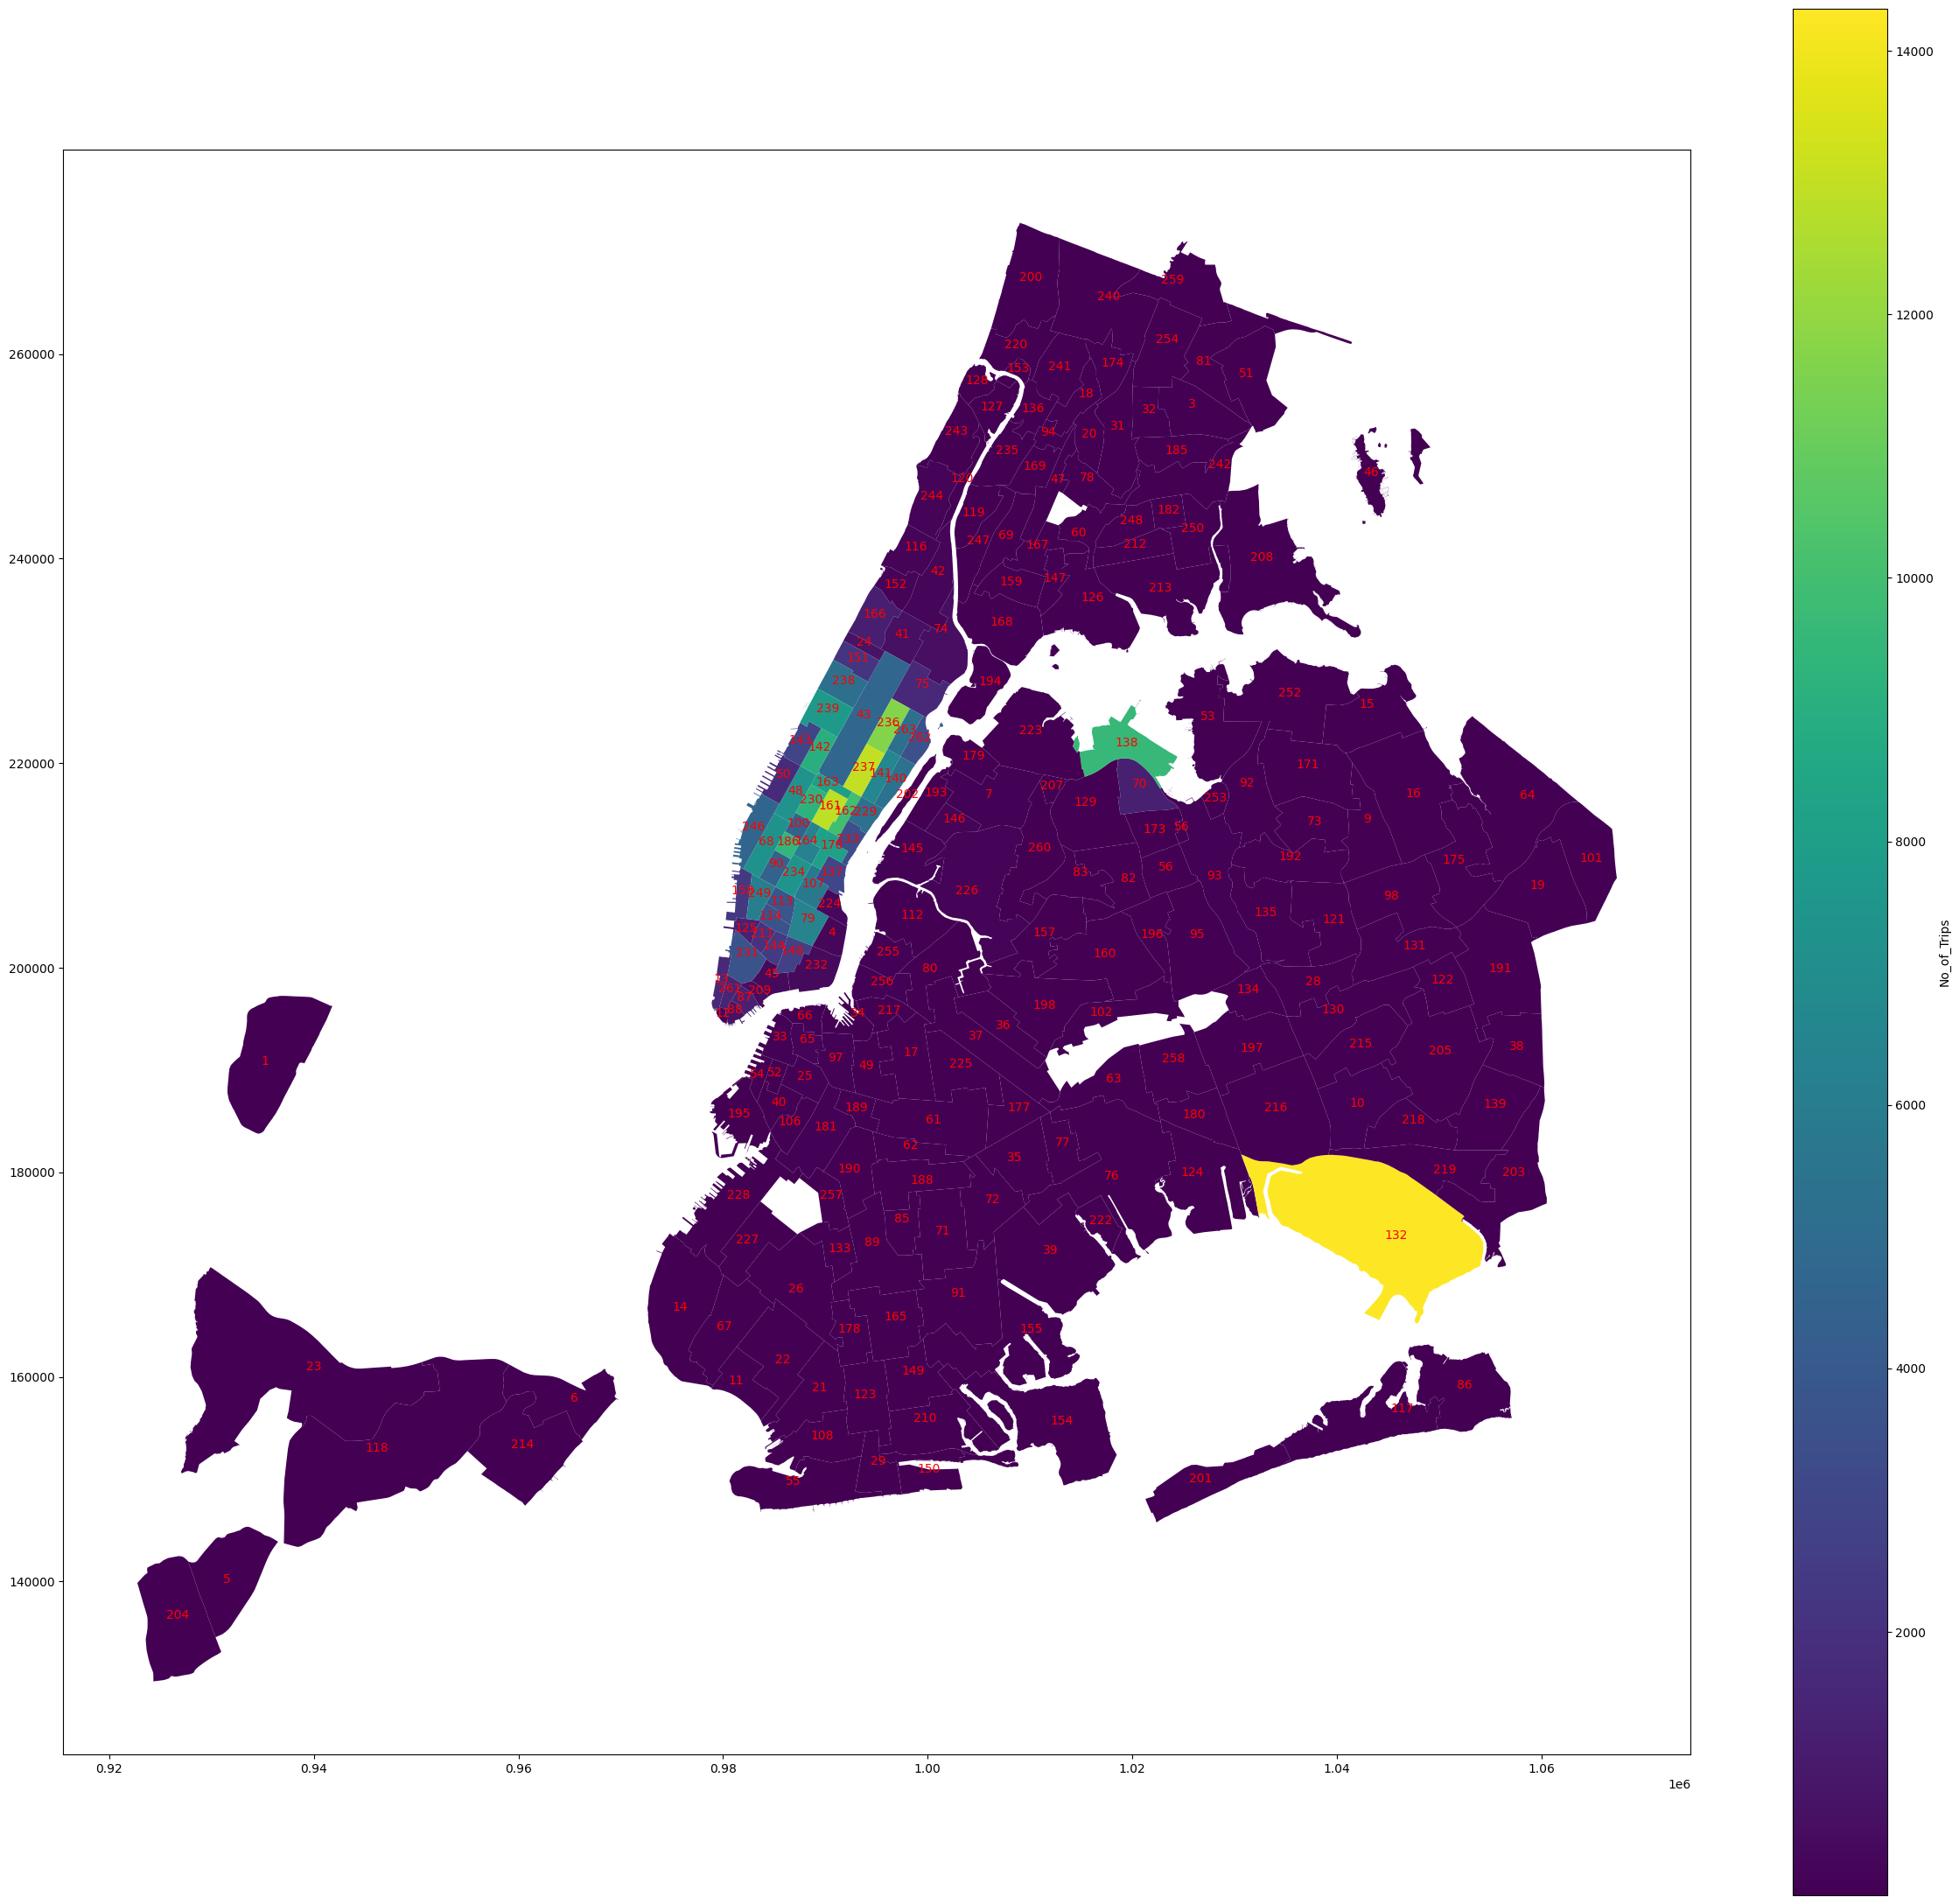

In [445]:
# Define figure and axis
zones['cordinates'] = zones['geometry'].apply(lambda x: x.representative_point().coords[:])
zones['cordinates']  = [coords[0] for coords in zones['cordinates']]
fig, ax = plt.subplots(1, 1, figsize = (30,28))
# Plot the map and display it
zones.plot(column = 'No_of_Trips',
ax = ax,
legend = True,
legend_kwds = {'label': "No_of_Trips", 'orientation': "vertical"})

for idx, row in zones.iterrows():
   plt.annotate(text=row['LocationID'], xy=row['cordinates'], horizontalalignment='center', color='red')

In [447]:
# can you try displaying the zones DF sorted by the number of trips?

sorted_zones = zones.sort_values(by='No_of_Trips',ascending = False)
sorted_zones.head()

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
114       132    0.245479    0.002038            JFK Airport         132   
210       237    0.042213    0.000096  Upper East Side South         237   
142       161    0.035804    0.000072         Midtown Center         161   
209       236    0.044252    0.000103  Upper East Side North         236   
143       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  index  \
114     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...    113   
210  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...    209   
142  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...    141   
209  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...    208   
143  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...    142   

     No_of_Trips                               cordinates  
114        14320   (1045786.102388208, 173472.4165341407)  
210        12993  (993753.3107039159, 219279.16268190742)  
142        12878   (990502.2531341929, 215519.8659350872)  
209        11659  (996166.3274583721, 223633.86497735977)  
143         9986  (991966.9405921373, 215006.45974473655)

In [449]:
sorted_zones = zones.sort_values(by='No_of_Trips')
sorted_zones.head()

OBJECTID  Shape_Leng  Shape_Area                              zone  \
90        101    0.101710    0.000452                         Glen Oaks   
179       204    0.101912    0.000641                 Rossville/Woodrow   
181       207    0.028376    0.000045  Saint Michaels Cemetery/Woodside   
168       192    0.111965    0.000374                   Queensboro Hill   
188       214    0.135300    0.000812          South Beach/Dongan Hills   

     LocationID        borough  \
90          101         Queens   
179         204  Staten Island   
181         207         Queens   
168         192         Queens   
188         214  Staten Island   

                                              geometry  index  No_of_Trips  \
90   POLYGON ((1066997.47 212947.337, 1067047.985 2...     89            1   
179  POLYGON ((927766.539 141772.465, 927864.475 14...    178            1   
181  POLYGON ((1011571.962 216050.175, 1011545.889 ...    180            1   
168  POLYGON ((1033459.319 212522.305, 1033758.551 ...    167            1   
188  POLYGON ((960669.201 156319.132, 960902.551 15...    187            1   

                                   cordinates  
90    (1064866.0948589384, 210368.4030623138)  
179   (926723.3299772477, 136351.64410331845)  
181   (1012138.6430596979, 217460.5394450724)  
168  (1035459.3924913721, 210539.65344911814)  
188   (960395.1139958481, 153009.26058036834)

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [457]:
# Find routes which have the slowest speeds at different times of the day
merged_data['Speed'] = round(merged_data['trip_distance']/(merged_data['trip_duration_in_minutes']/60),2)
merged_data['Speed'].describe()

count    271069.000000
mean         11.811307
std          56.864210
min           0.010000
25%           7.180000
50%           9.650000
75%          13.340000
max       16714.290000
Name: Speed, dtype: float64

In [459]:
##Remove data which indicates speed more than 150
merged_data= merged_data[merged_data['Speed']<150]

In [485]:
## Grouping the speed by hour by taking mean of speed for the hour
location_hourly_speed=merged_data.groupby(['PULocationID','DOLocationID','Hour'])['Speed'].mean().reset_index()
location_hourly_speed= location_hourly_speed.sort_values(by='Speed').reset_index()

In [489]:
location_hourly_speed.head()

index  PULocationID  DOLocationID  Hour  Speed
0  16954           113           235    22   0.05
1  22604           134           265    15   0.07
2  44856           220           236    11   0.10
3  19087           128           128     7   0.12
4  50383           233           264    20   0.14

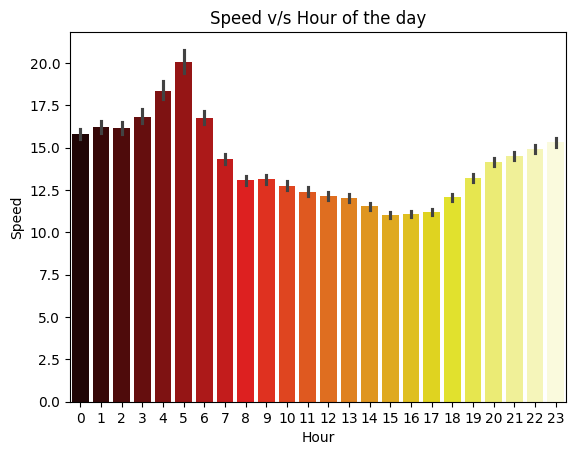

In [491]:
sns.barplot(x='Hour',y='Speed',data=location_hourly_speed,palette='hot')
plt.title("Speed v/s Hour of the day")
plt.show()

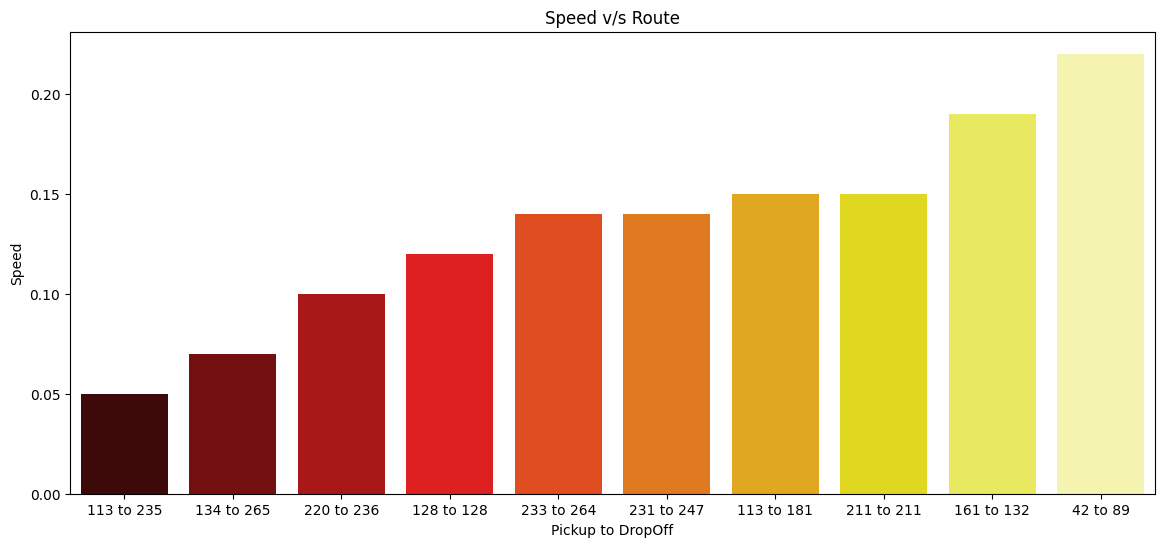

In [519]:
slowest_route = location_hourly_speed.head(10)
plt.figure(figsize=(14,6))
sns.barplot(x=slowest_route['PULocationID'].astype(str)+" to "+slowest_route['DOLocationID'].astype(str),y='Speed',data=slowest_route,palette='hot')
plt.title("Speed v/s Route")
plt.xlabel("Pickup to DropOff")
plt.show()

In [511]:
slowest_route

index  PULocationID  DOLocationID  Hour  Speed
0  16954           113           235    22   0.05
1  22604           134           265    15   0.07
2  44856           220           236    11   0.10
3  19087           128           128     7   0.12
4  50383           233           264    20   0.14
5  48994           231           247    15   0.14
6  16756           113           181    19   0.15
7  44400           211           211     0   0.15
8  34735           161           132    20   0.19
9   2365            42            89    17   0.22

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

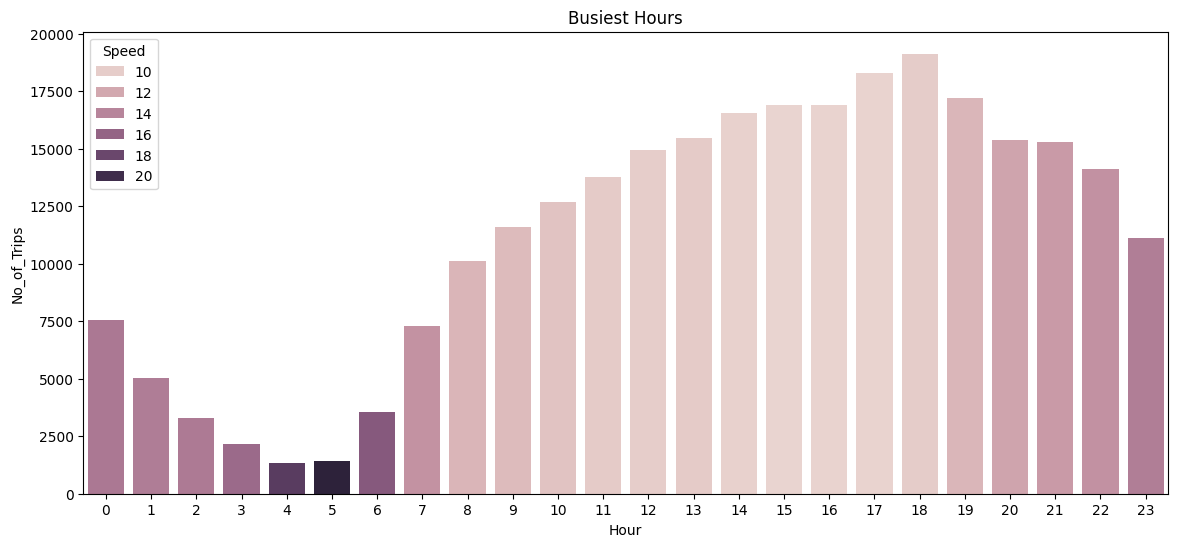

In [529]:
# Visualise the number of trips per hour and find the busiest hour
speed_hour_count=merged_data.groupby('Hour').agg({'Speed':'mean','VendorID':'count'})
speed_hour_count['Speed'] = round(speed_hour_count['Speed'],2)
speed_hour_count=speed_hour_count.rename(columns={'VendorID':'No_of_Trips'})
speed_hour_count.reset_index(inplace=True)
plt.figure(figsize=(14,6))
sns.barplot(x=speed_hour_count['Hour'],y=speed_hour_count['No_of_Trips'],hue =speed_hour_count['Speed'])
plt.title("Busiest Hours")
plt.show()

In [523]:
speed_hour_count

Speed    24
dtype: int64

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [537]:
# Scale up the number of trips
hourly_trips = merged_data.groupby("Hour").size().reset_index(name="no_of_sample_trips")
busiest_hours = hourly_trips.sort_values(by="no_of_sample_trips", ascending=False)
sample_fraction = 0.75
busiest_hours["actual_no_of_trips"] = (busiest_hours["no_of_sample_trips"] * 100) / sample_fraction
busiest_hours["actual_no_of_trips_in_millions"] =busiest_hours["actual_no_of_trips"]/1000000
# Fill in the value of your sampling fraction and use that to scale up the numbers
busiest_hours.head()


Hour  no_of_sample_trips  actual_no_of_trips  \
18    18               19122        2.549600e+06   
17    17               18281        2.437467e+06   
19    19               17205        2.294000e+06   
15    15               16903        2.253733e+06   
16    16               16896        2.252800e+06   

    actual_no_of_trips_in_millions  
18                        2.549600  
17                        2.437467  
19                        2.294000  
15                        2.253733  
16                        2.252800

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

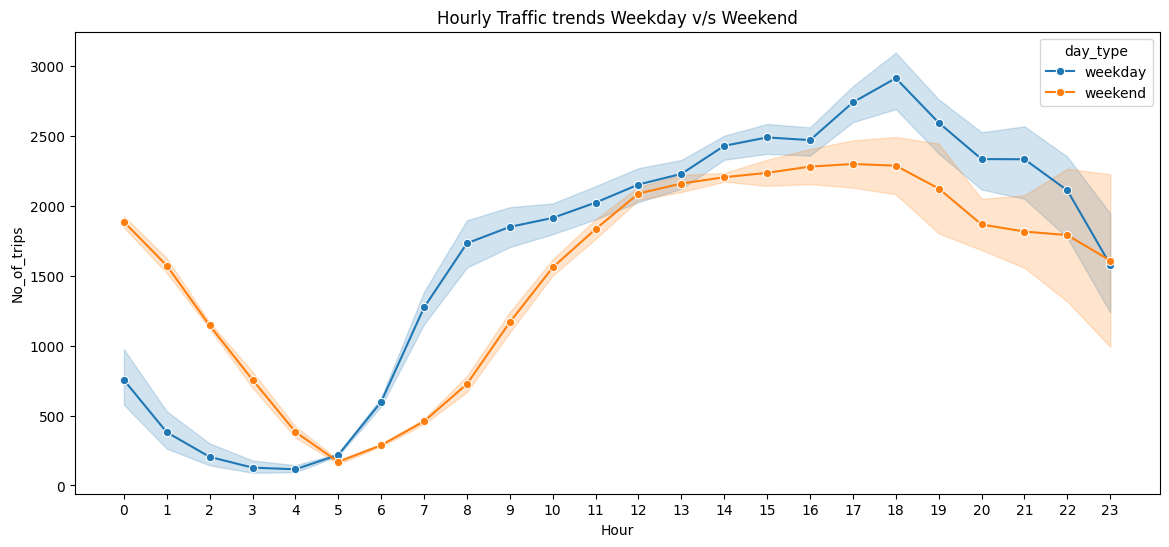

In [541]:
# Compare traffic trends for the week days and weekends
daily_data =merged_data.groupby(['Day_of_Pickup','Hour']).size().reset_index(name='No_of_trips')


weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Saturday', 'Sunday']
#Seggregating daa in weekday and weekend category
daily_data['day_type'] = daily_data['Day_of_Pickup'].apply(lambda x : 'weekend' if x in weekend else 'weekday')

plt.figure(figsize=(14,6))
sns.lineplot(x=daily_data['Hour'],y=daily_data['No_of_trips'],hue =daily_data['day_type'],marker='o')
plt.title('Hourly Traffic trends Weekday v/s Weekend')
plt.xticks(range(24))
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [543]:
merged_data['Drop_Hour'] = merged_data.tpep_dropoff_datetime.dt.hour

In [555]:
# Find top 10 pickup and dropoff zones

#top 10 pickup
pickup_zone_hour=merged_data.groupby(['PULocationID','Hour']).size().reset_index(name='No_of_Trips')
pickup_zone_hour= pickup_zone_hour.sort_values(by='No_of_Trips',ascending=False)
pick_up_top_values=pickup_zone_hour.groupby('PULocationID').head(1).reset_index(drop=True)
top_10_pickup=pick_up_top_values.head(10)


#top 10 dropoff
dropoff_zone_hour=merged_data.groupby(['DOLocationID','Drop_Hour']).size().reset_index(name='No_of_Trips')
dropoff_zone_hour= dropoff_zone_hour.sort_values(by='No_of_Trips',ascending=False)
dropoff_top_values=dropoff_zone_hour.groupby('DOLocationID').head(1).reset_index(drop=True)
top_10_dropoff=dropoff_top_values.head(10)


In [559]:
top_10_pickup_ID = top_10_pickup['PULocationID']
top_10_dropoff_ID = top_10_dropoff['DOLocationID']

In [565]:
top_10_pickup_zone_data= merged_data[merged_data['PULocationID'].isin(top_10_pickup_ID)]
top_10_dropoff_zone_data = merged_data[merged_data['DOLocationID'].isin(top_10_dropoff_ID)]

In [599]:
pickup_data_10 =top_10_pickup_zone_data.groupby(['PULocationID','Hour']).size().reset_index(name='No_of_Trips')
dropoff_data_10 = top_10_dropoff_zone_data.groupby(['DOLocationID','Drop_Hour']).size().reset_index(name='No_of_Trips')

In [601]:
pickup_data_10 =pickup_data_10.pivot(index="PULocationID", columns="Hour", values="No_of_Trips")
dropoff_data_10 = dropoff_data_10.pivot(index="DOLocationID", columns="Drop_Hour", values="No_of_Trips")

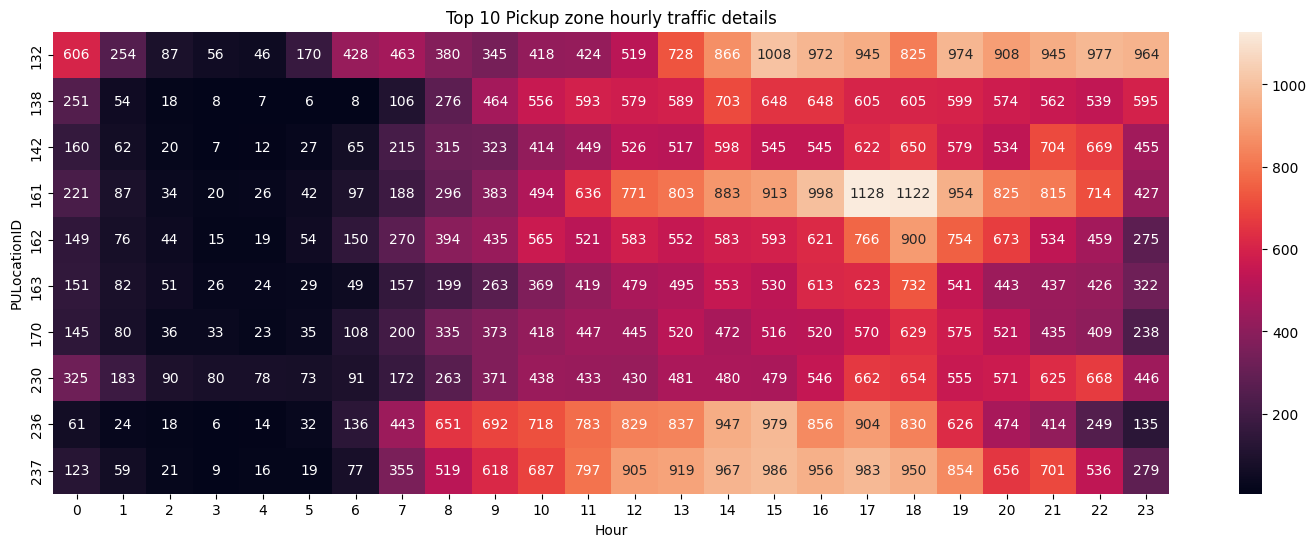

In [613]:
plt.figure(figsize=(18,6))
sns.heatmap(data =pickup_data_10,annot=True,fmt=".0f")
plt.title("Top 10 Pickup zone hourly traffic details")
plt.show()

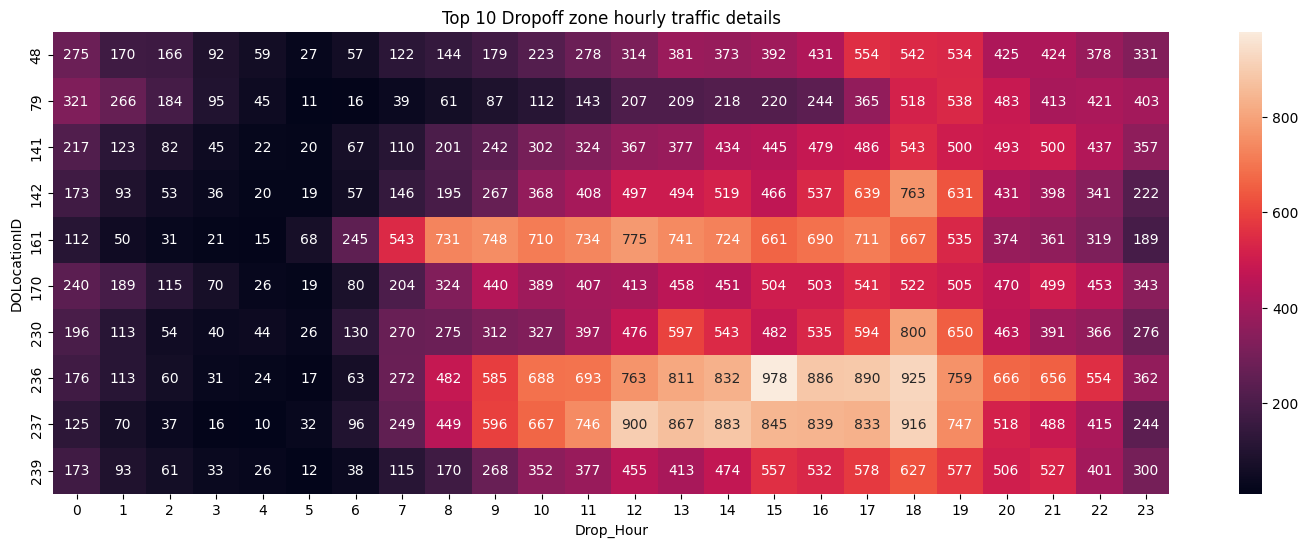

In [615]:
plt.figure(figsize=(18,6))
sns.heatmap(data =dropoff_data_10,annot=True,fmt=".0f")
plt.title("Top 10 Dropoff zone hourly traffic details")
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [619]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
df_pickup=pickup_zone_hour.groupby('PULocationID')['No_of_Trips'].sum().reset_index()
df_drop=dropoff_zone_hour.groupby('DOLocationID')['No_of_Trips'].sum().reset_index()
df_merged_pick_drop = df_pickup.merge(df_drop,left_on='PULocationID',right_on='DOLocationID')
df_merged_pick_drop=df_merged_pick_drop.rename(columns={'No_of_Trips_x':'No_of_Trips_Pickup','No_of_Trips_y':'No_of_Trips_drop'})
df_merged_pick_drop['ratio'] = round(df_merged_pick_drop['No_of_Trips_Pickup']/df_merged_pick_drop['No_of_Trips_drop'],2)
df_merged_pick_drop_sorted=df_merged_pick_drop.sort_values(by='ratio').reset_index()
top_10_ratio=df_merged_pick_drop_sorted.tail(10)
lowest_10_ratio=df_merged_pick_drop_sorted.head(10)


In [621]:
top_10_ratio

index  PULocationID  No_of_Trips_Pickup  DOLocationID  No_of_Trips_drop  \
224     88           100                4480           100              3783   
225    141           161               12877           161             10755   
226    142           162                9985           162              7806   
227    220           249                6130           249              4469   
228     96           114                3607           114              2623   
229     38            43                4683            43              3399   
230    162           186                9405           186              6142   
231    119           138                9593           138              3250   
232    113           132               14308           132              2857   
233     61            70                1254            70               133   

     ratio  
224   1.18  
225   1.20  
226   1.28  
227   1.37  
228   1.38  
229   1.38  
230   1.53  
231   2.95  
232   5.01  
233   9.43

In [623]:
lowest_10_ratio

index  PULocationID  No_of_Trips_Pickup  DOLocationID  No_of_Trips_drop  \
0      0             1                   6             1               757   
1    199           227                   1           227                42   
2    227           257                   3           257               110   
3     32            37                   8            37               271   
4    222           252                   2           252                55   
5     89           101                   1           101                24   
6     94           112                  26           112               637   
7    167           192                   1           192                24   
8    174           200                   4           200                93   
9    173           198                   6           198               135   

   ratio  
0   0.01  
1   0.02  
2   0.03  
3   0.03  
4   0.04  
5   0.04  
6   0.04  
7   0.04  
8   0.04  
9   0.04

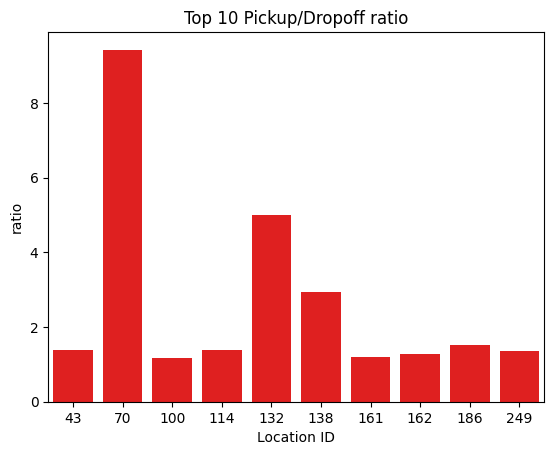

In [631]:
sns.barplot(data=top_10_ratio,x='PULocationID',y='ratio',color='Red')
plt.title('Top 10 Pickup/Dropoff ratio')
plt.xlabel('Location ID')
plt.show()

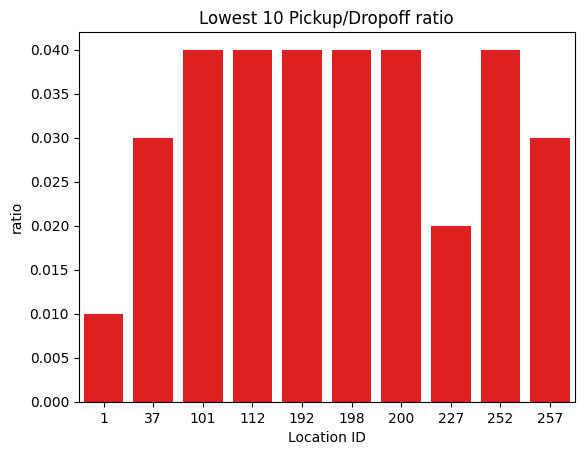

In [629]:
sns.barplot(data=lowest_10_ratio,x='PULocationID',y='ratio',color='Red')
plt.title('Lowest 10 Pickup/Dropoff ratio')
plt.xlabel('Location ID')
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [639]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours= [23,0,1,2,3,4,5]
pickup_zone_hour= pickup_zone_hour.sort_values(by='No_of_Trips',ascending=False)
pickup_zone_night = pickup_zone_hour[pickup_zone_hour['Hour'].isin(night_hours)]
pickup_zone_night_sum =pickup_zone_night.groupby('PULocationID')['No_of_Trips'].sum().reset_index()
pickup_zone_night_sum=pickup_zone_night_sum.sort_values(by='No_of_Trips',ascending=False)
pickup_zone_night_10=pickup_zone_night_sum.head(10)


In [641]:
dropoff_zone_hour= dropoff_zone_hour.sort_values(by='No_of_Trips',ascending=False)
dropoff_zone_night = dropoff_zone_hour[dropoff_zone_hour['Drop_Hour'].isin(night_hours)]
dropoff_zone_night_sum =dropoff_zone_night.groupby('DOLocationID')['No_of_Trips'].sum().reset_index()
dropoff_zone_night_sum=dropoff_zone_night_sum.sort_values(by='No_of_Trips',ascending=False)
dropoff_zone_night_10=dropoff_zone_night_sum.head(10)

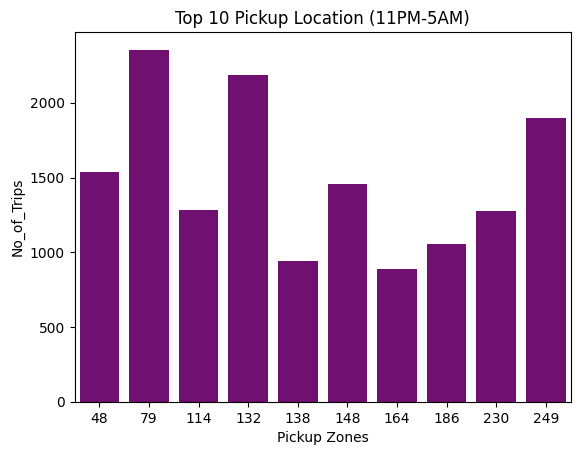

In [655]:
sns.barplot(data=pickup_zone_night_10,x='PULocationID',y='No_of_Trips',color='Purple')
plt.title('Top 10 Pickup Location (11PM-5AM)')
plt.xlabel("Pickup Zones")
plt.show()

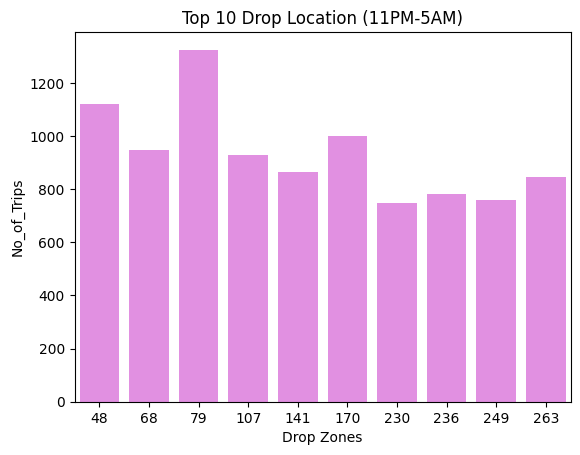

In [657]:
sns.barplot(data=dropoff_zone_night_10,x='DOLocationID',y='No_of_Trips',color='Violet')
plt.title('Top 10 Drop Location (11PM-5AM)')
plt.xlabel("Drop Zones")
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [659]:
# Filter for night hours (11 PM to 5 AM)
merged_data_night = merged_data[merged_data['Hour'].isin(night_hours)]
merged_data_day = merged_data[~merged_data['Hour'].isin(night_hours)]
night_revenue = round(merged_data_night['total_amount'].sum(),2)
day_revenue= round(merged_data_day['total_amount'].sum(),2)
total_revenue= round(merged_data['total_amount'].sum(),2)

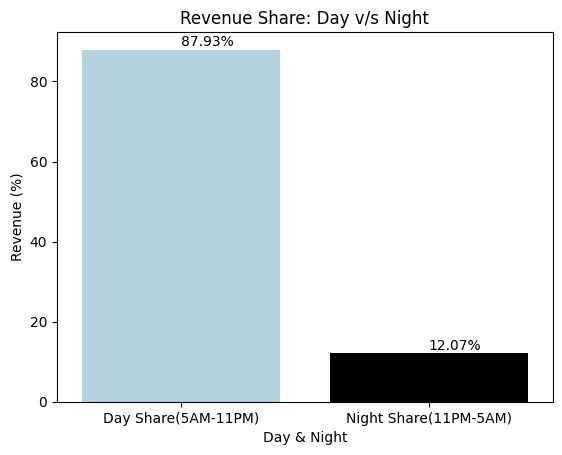

In [731]:
night_revenue_share = (night_revenue/total_revenue)*100
day_revenue_share = (day_revenue/total_revenue)*100
sns.barplot(y=[day_revenue_share,night_revenue_share],x=["Day Share(5AM-11PM)","Night Share(11PM-5AM)"],palette=['lightblue','black'])
plt.ylabel('Revenue (%)')
plt.xlabel('Day & Night')
plt.title("Revenue Share: Day v/s Night")
plt.text(0, day_revenue_share+1, f"{day_revenue_share:.2f}%")
plt.text(1, night_revenue_share+1, f"{night_revenue_share:.2f}%")
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

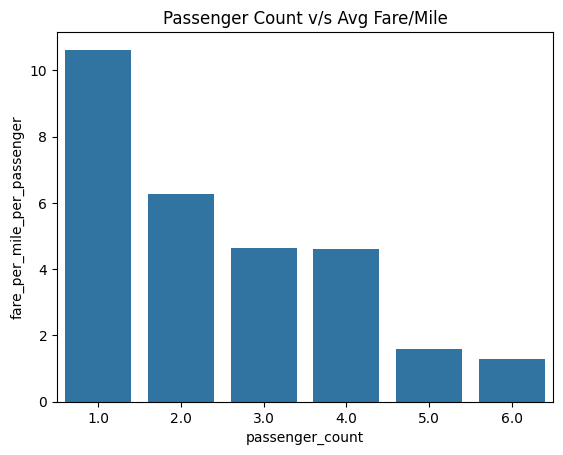

In [717]:
# Analyse the fare per mile per passenger for different passenger counts

## Calculating fare amount per passenger per mile
merged_data['fare_per_mile'] = merged_data['fare_amount']/merged_data['trip_distance']
merged_data['fare_per_mile_per_passenger'] = merged_data['fare_per_mile'] /merged_data['passenger_count']
passenger_count_fare  = merged_data.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

## Plot the chart for the analysis
sns.barplot(x='passenger_count',y='fare_per_mile_per_passenger',data=passenger_count_fare)
plt.title("Passenger Count v/s Avg Fare/Mile")
plt.show()


passenger_count  fare_per_mile_per_passenger
0              1.0                    10.620329
1              2.0                     6.277501
2              3.0                     4.627675
3              4.0                     4.616397
4              5.0                     1.585842
5              6.0                     1.278640

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [735]:
# Compare the average fare per mile for different days and for different times of the day

#Calculate average fare per day and hour
avg_fare_days_hours=merged_data.groupby(['Day_of_Pickup','Hour'])['fare_per_mile'].mean().reset_index()
avg_fare_days_hours['Day_of_Pickup'] = pd.Categorical(avg_fare_days_hours['Day_of_Pickup'], categories=day_order, ordered=True)
avg_fare_days_hours = avg_fare_days_hours.sort_values('Day_of_Pickup')

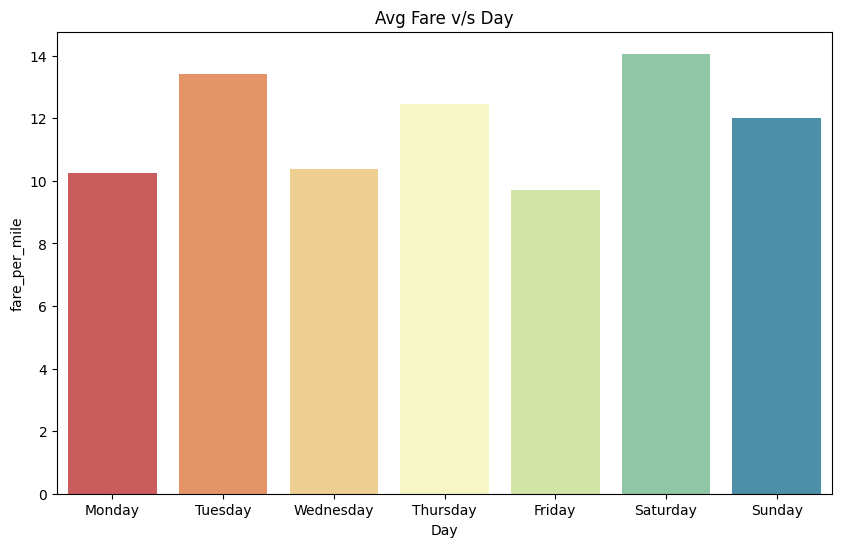

In [795]:
##Plot graph for avg fare v/s day
plt.figure(figsize=(10,6))
sns.barplot(y='fare_per_mile',x='Day_of_Pickup',data=avg_fare_days_hours,palette='Spectral',ci=0)
plt.title('Avg Fare v/s Day')
plt.xlabel('Day')
plt.show()


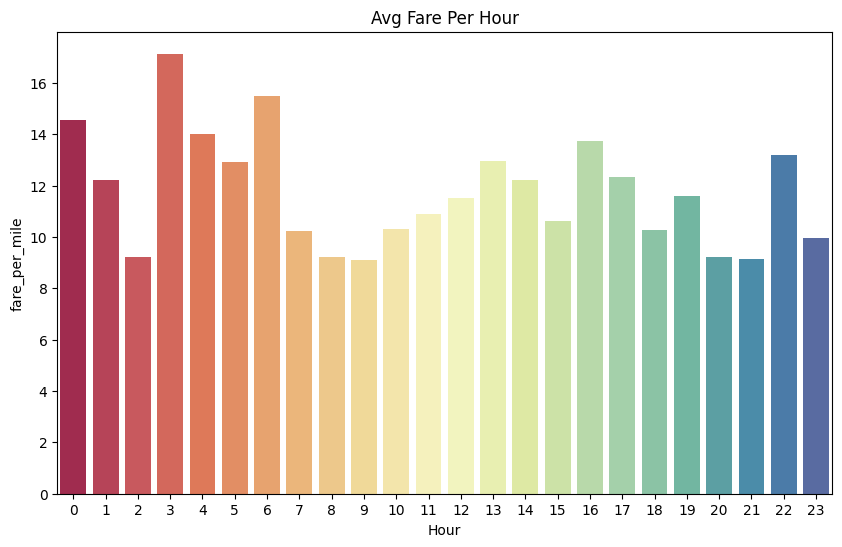

In [789]:
plt.figure(figsize=(10,6))
sns.barplot(y='fare_per_mile',x='Hour',data=avg_fare_days_hours,palette='Spectral',ci=0)
plt.title('Avg Fare Per Hour')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [1147]:
count_vendor = merged_data.groupby('VendorID').size().reset_index(name="No_of_trips")
count_vendor

VendorID  No_of_trips
0         1        71299
1         2       199770

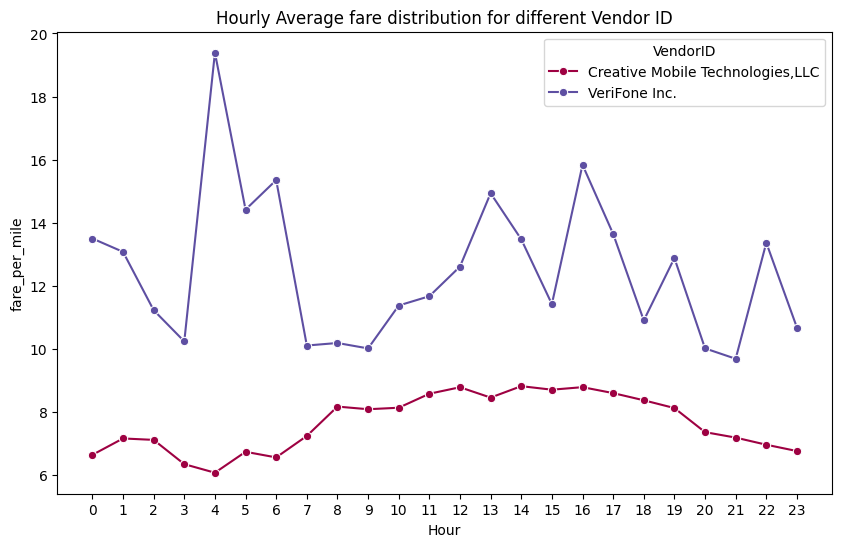

In [825]:
# Compare fare per mile for different vendors
avg_fare_vendor_hour=merged_data.groupby(['VendorID','Hour'])['fare_per_mile'].mean().reset_index()

# Plot the chart showing comparison of vendors fare during the hours of the day
plt.figure(figsize=(10, 6))
line_plot= sns.lineplot(x= avg_fare_vendor_hour['Hour'],y=avg_fare_vendor_hour['fare_per_mile'],hue=avg_fare_vendor_hour['VendorID'],marker='o',palette='Spectral')
new_labels = ['Creative Mobile Technologies,LLC', 'VeriFone Inc.']
plt.xticks(range(24))
for x, y in zip(line_plot.legend_.texts, new_labels):
    x.set_text(y)
plt.title('Hourly Average fare distribution for different Vendor ID')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


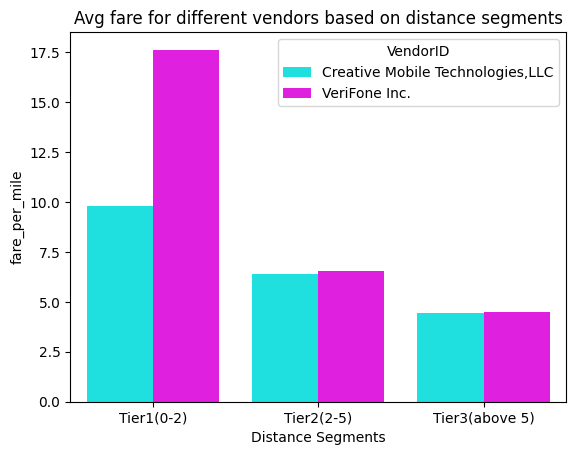

In [859]:
# Defining distance tiers
def tiers(x):
    if x<=2:
        return 'Tier1(0-2)'
    elif (x>2 and x<=5):
        return 'Tier2(2-5)'
    else:
        return 'Tier3(above 5)'
merged_data['distance_tiers'] = merged_data['trip_distance'].apply(tiers)

# Grouping based on Vendors and Tiers
vendor_tier_fare = merged_data.groupby(['distance_tiers','VendorID'])['fare_per_mile'].mean().reset_index()
bar_plot= sns.barplot(x= vendor_tier_fare['distance_tiers'],y=vendor_tier_fare['fare_per_mile'],hue=vendor_tier_fare['VendorID'],palette="cool")
new_labels = ['Creative Mobile Technologies,LLC', 'VeriFone Inc.']
for x, y in zip(bar_plot.legend_.texts, new_labels):
    x.set_text(y)
plt.title('Avg fare for different vendors based on distance segments')
plt.xlabel('Distance Segments')
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

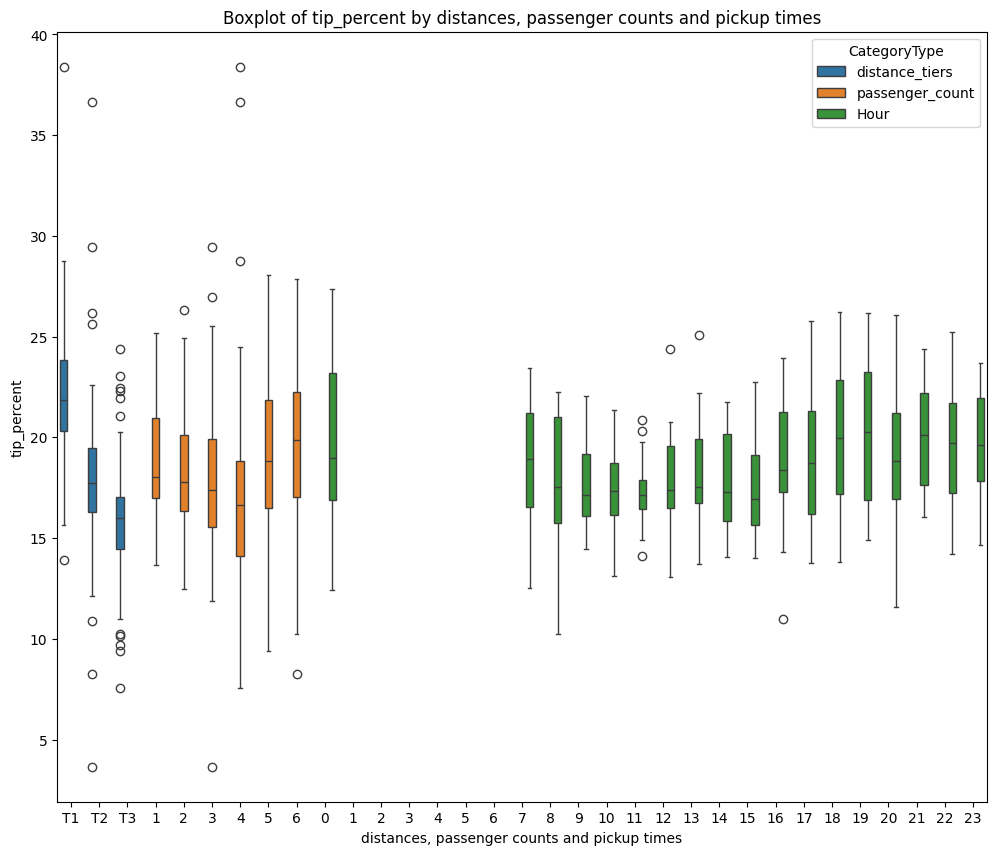

In [885]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

#Remove data which has fare_amount=0 to ensure percentage is calculated correctly.
merge_data_fare = merged_data[~(merged_data['fare_amount']==0)]
#Calculate tip percent
merge_data_fare['tip_percent'] = round((merge_data_fare['tip_amount']/merge_data_fare['fare_amount'])*100,2)
tip_percent_analysis = merge_data_fare.groupby(['distance_tiers','passenger_count','Hour'])['tip_percent'].mean().reset_index()
tip_percent_melted = tip_percent_analysis.melt(id_vars='tip_percent', value_vars=['distance_tiers','passenger_count','Hour'], 
                    var_name='CategoryType', value_name='distances, passenger counts and pickup times')
## Plotting box chart for tip percent versus different categories
plt.figure(figsize=(12,10))
ax=sns.boxplot(x='distances, passenger counts and pickup times', y='tip_percent', hue='CategoryType', data=tip_percent_melted)
ax.set_xticklabels(["T1","T2","T3",1,2,3,4,5,6,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.title('Boxplot of tip_percent by distances, passenger counts and pickup times')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%




**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

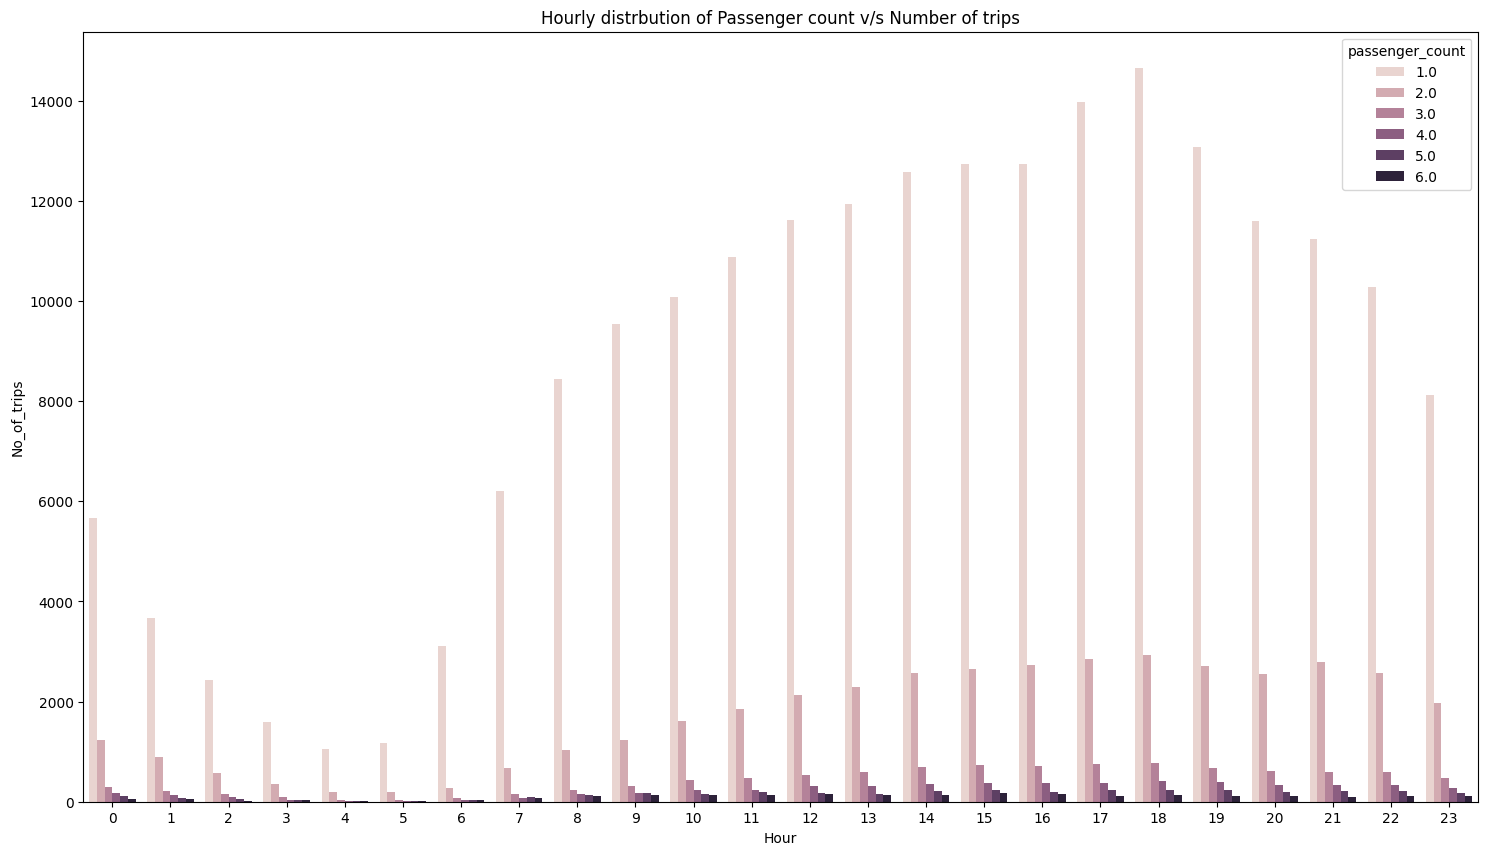

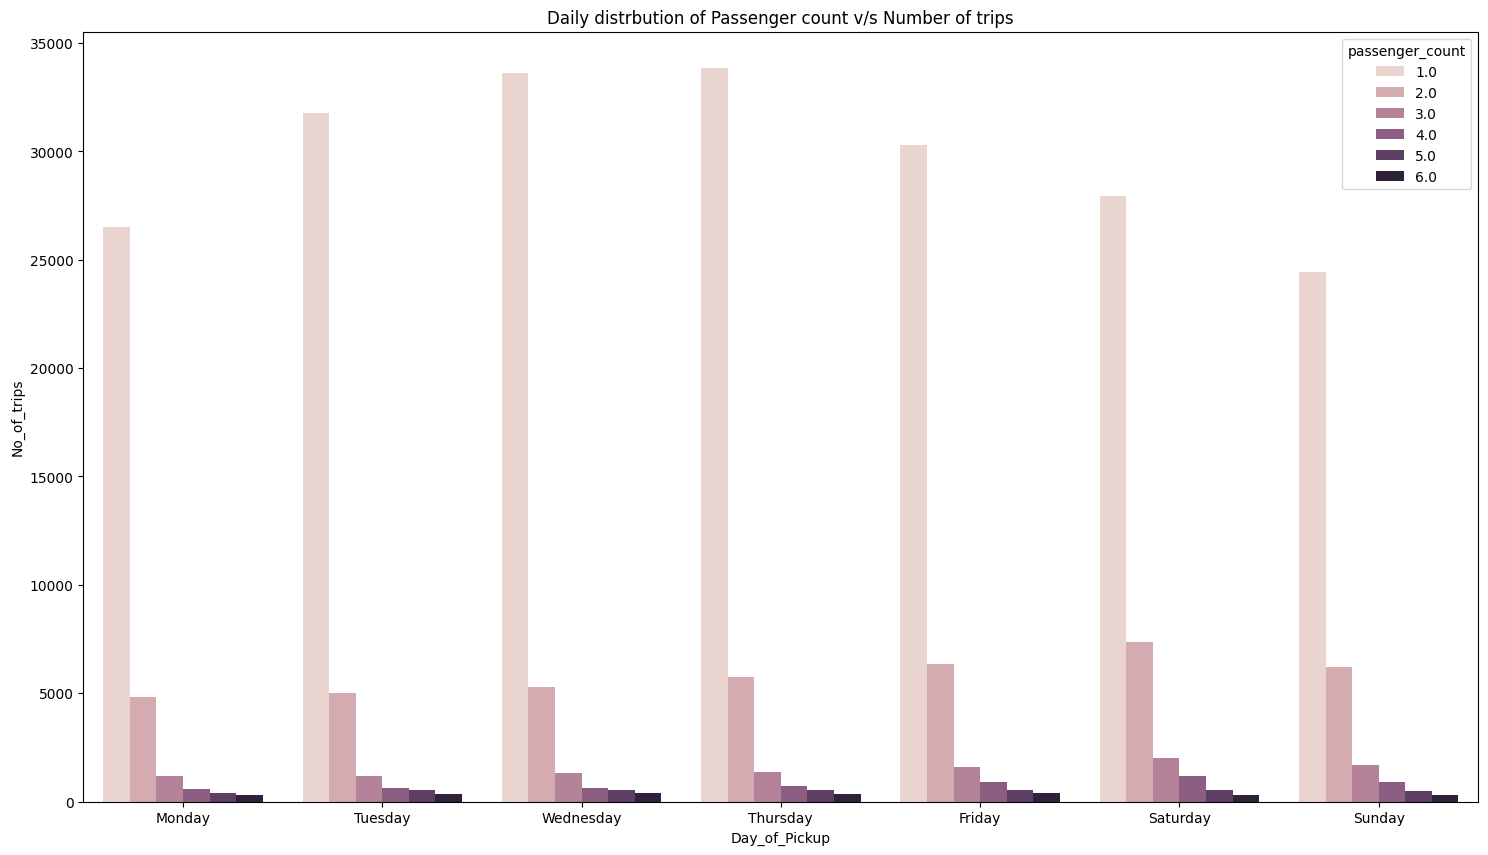

In [913]:
# See how passenger count varies across hours and days
pass_count_stats=merged_data.groupby(['Day_of_Pickup','Hour','passenger_count']).size().reset_index(name='No_of_trips')
pass_hour_count=pass_count_stats.groupby(['Hour','passenger_count'])['No_of_trips'].sum().reset_index()
pass_count_stats['Day_of_Pickup'] = pd.Categorical(pass_count_stats['Day_of_Pickup'], categories=day_order, ordered=True)
pass_count_stats = pass_count_stats.sort_values('Day_of_Pickup')
pass_day_count=pass_count_stats.groupby(['Day_of_Pickup','passenger_count'])['No_of_trips'].sum().reset_index()
# Plot passenger count v/s hours of travel
plt.figure(figsize=(18,10))
sns.barplot(x='Hour',y='No_of_trips', hue='passenger_count',data=pass_hour_count)
plt.xticks(np.arange(24))
plt.title("Hourly distrbution of Passenger count v/s Number of trips")
plt.show()

# Plot passenger count v/s days of travel
plt.figure(figsize=(18,10))
sns.barplot(x='Day_of_Pickup', y='No_of_trips', hue='passenger_count',data=pass_day_count)
plt.xticks(np.arange(0, 7, 1))
plt.title("Daily distrbution of Passenger count v/s Number of trips")
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [1133]:
# How does passenger count vary across zones

zones = zones.drop('level_0',axis=1)

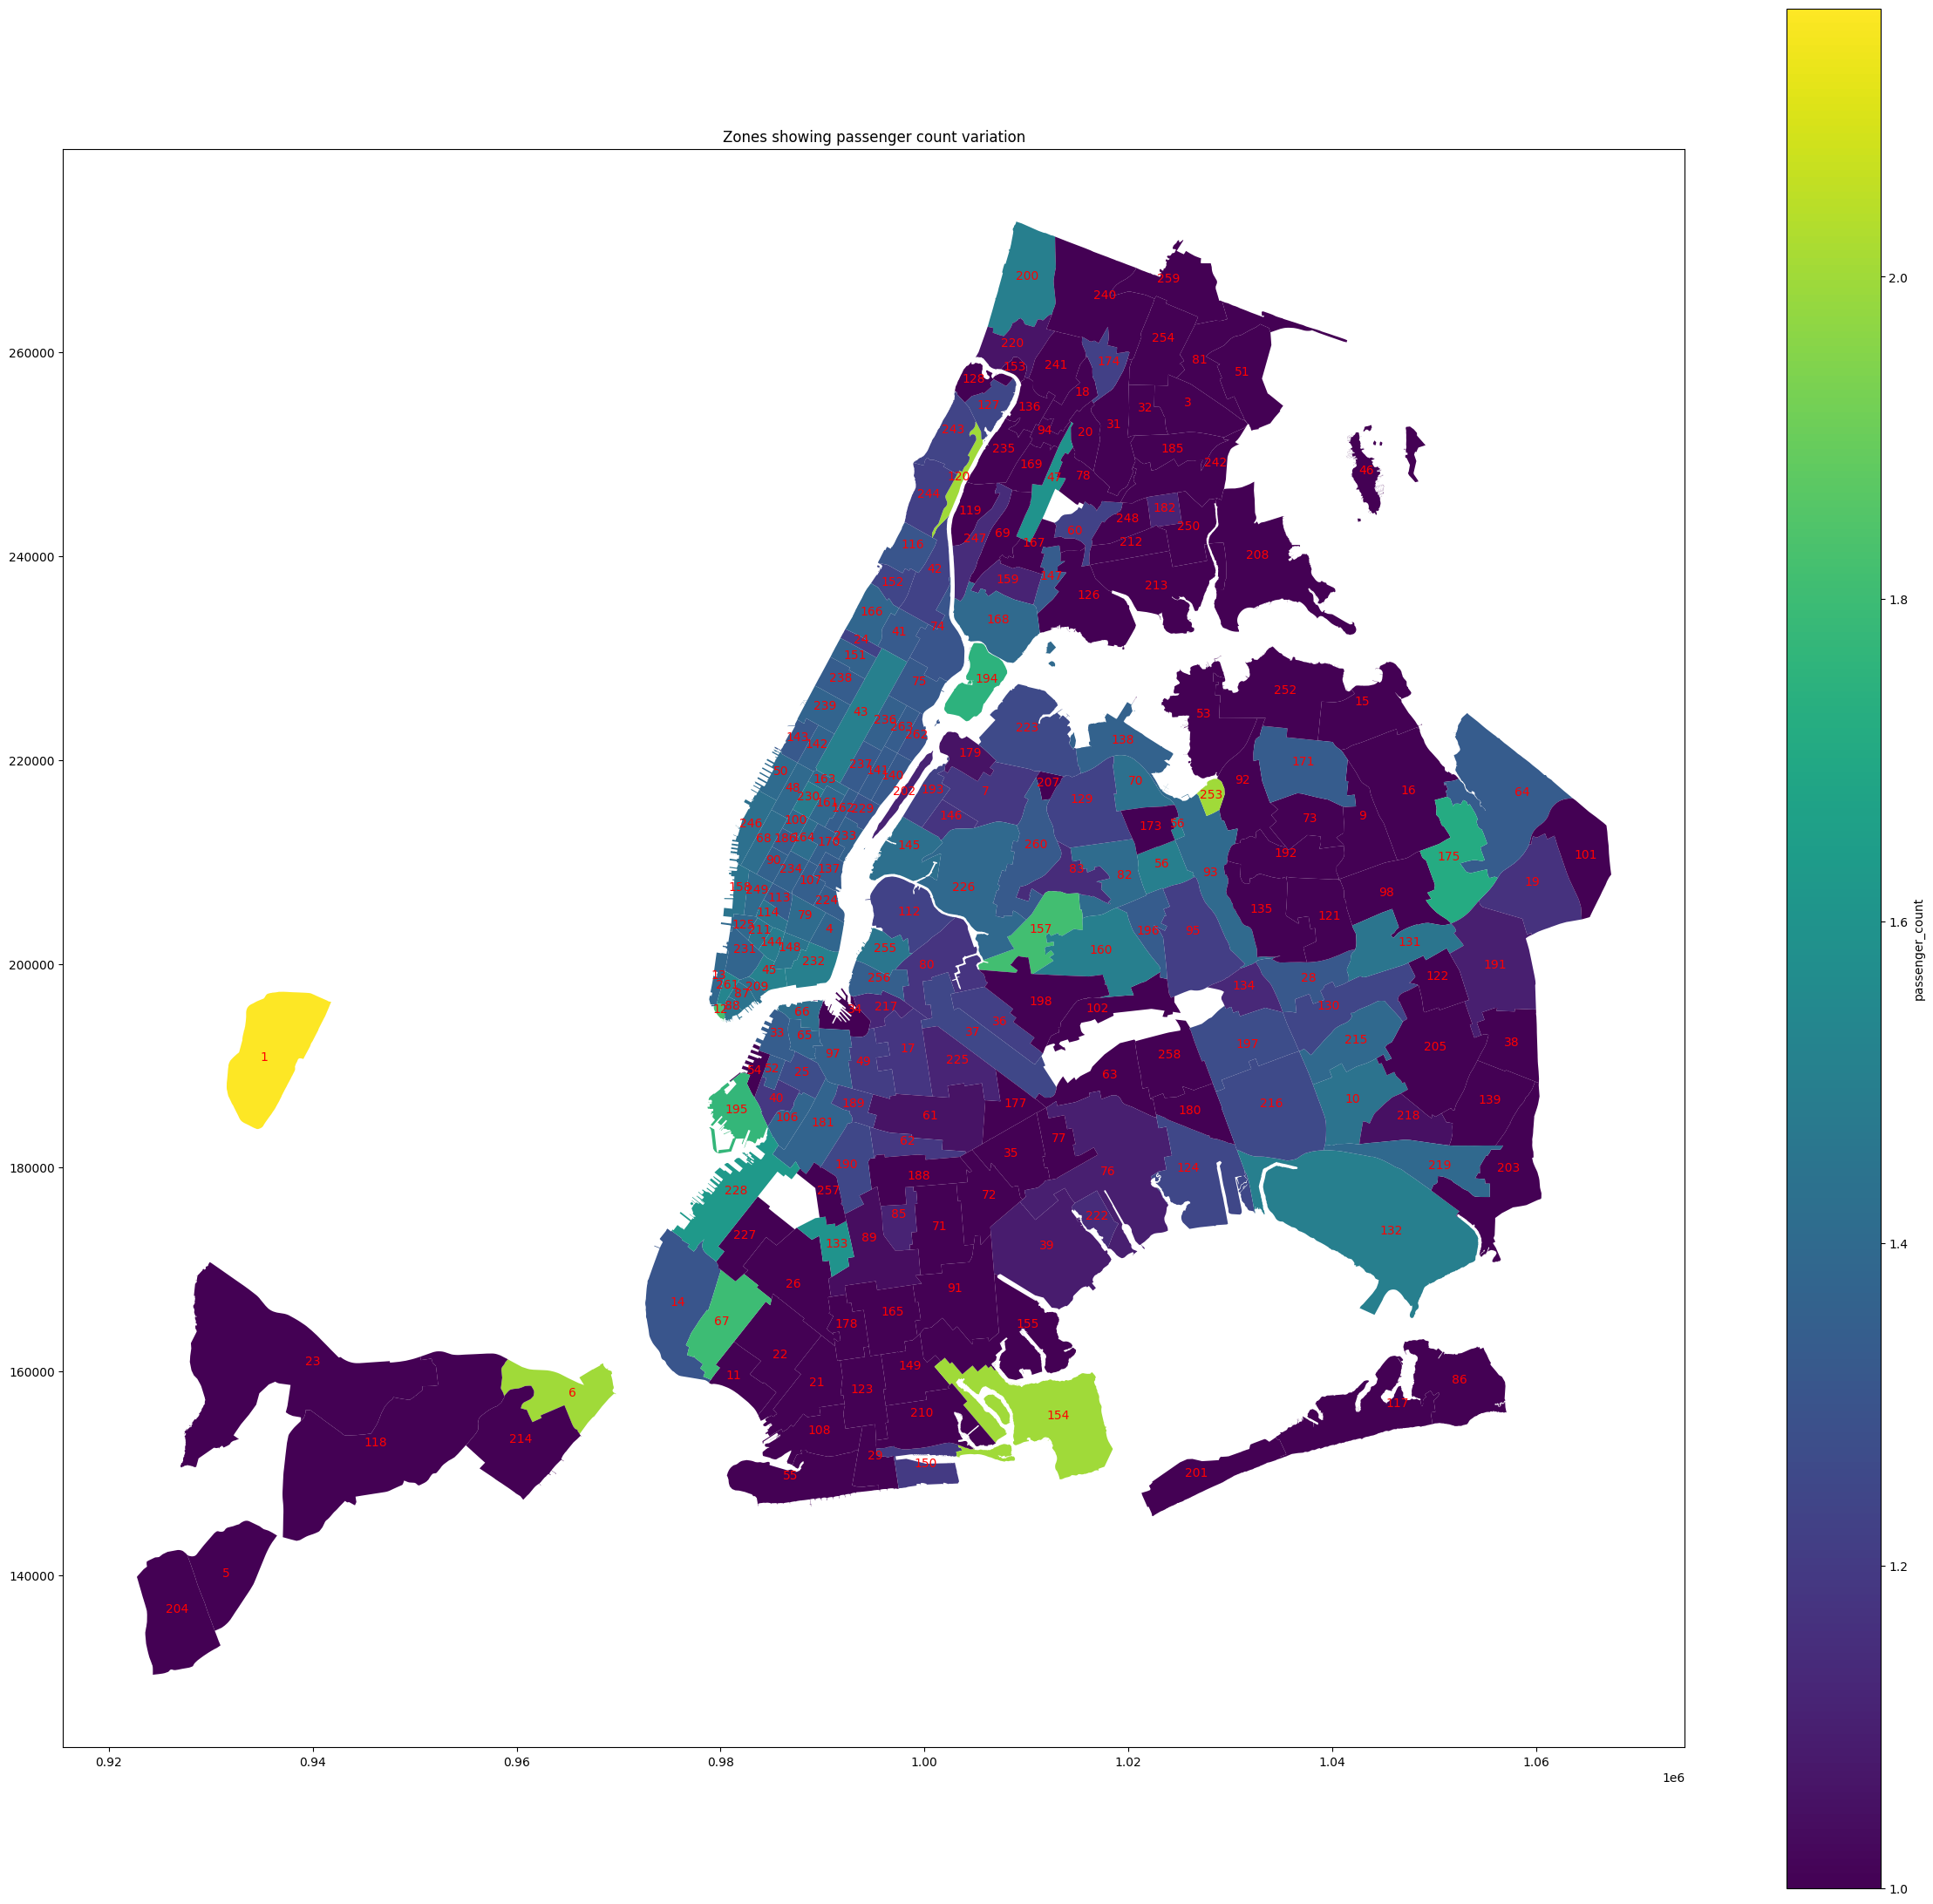

In [1137]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
pass_count_data = merged_data.groupby(['zone'])['passenger_count'].mean().reset_index()
zones = zones.merge(pass_count_data,on = 'zone').reset_index()

zones['cordinates'] = zones['geometry'].apply(lambda x: x.representative_point().coords[:])
zones['cordinates']  = [coords[0] for coords in zones['cordinates']]
fig, ax = plt.subplots(1, 1, figsize = (30,28))
# Plot the map and display it
zones.plot(column = 'passenger_count',
ax = ax,
legend = True,
legend_kwds = {'label': "passenger_count", 'orientation': "vertical"})

for idx, row in zones.iterrows():
   plt.annotate(text=row['LocationID'], xy=row['cordinates'], horizontalalignment='center', color='red')

plt.title("Zones showing passenger count variation")
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

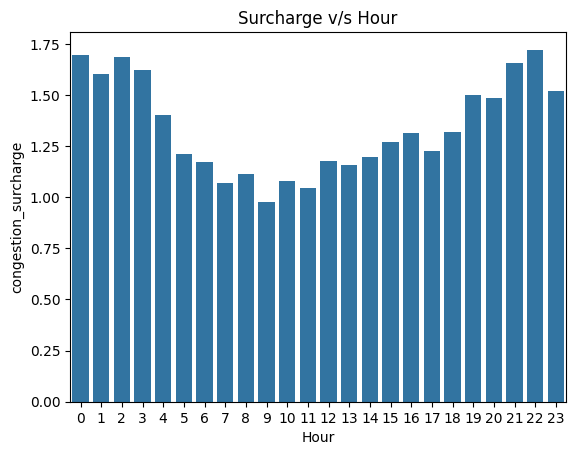

In [1025]:
# How often is each surcharge applied?
zone_hour_surcharge=merged_data.groupby(['zone','Hour'])['congestion_surcharge'].mean().reset_index()
hour_surcharge=zone_hour_surcharge.groupby('Hour')['congestion_surcharge'].mean().reset_index()
sns.barplot(x='Hour',y='congestion_surcharge',data=hour_surcharge)
plt.title("Surcharge v/s Hour")
plt.show()


In [1111]:
zones.congestion_surcharge = round(zones.congestion_surcharge,2)

In [1093]:
zone_surcharge=zone_hour_surcharge.groupby('zone')['congestion_surcharge'].mean().reset_index()
zones = zones.merge(zone_surcharge,on = 'zone').reset_index()

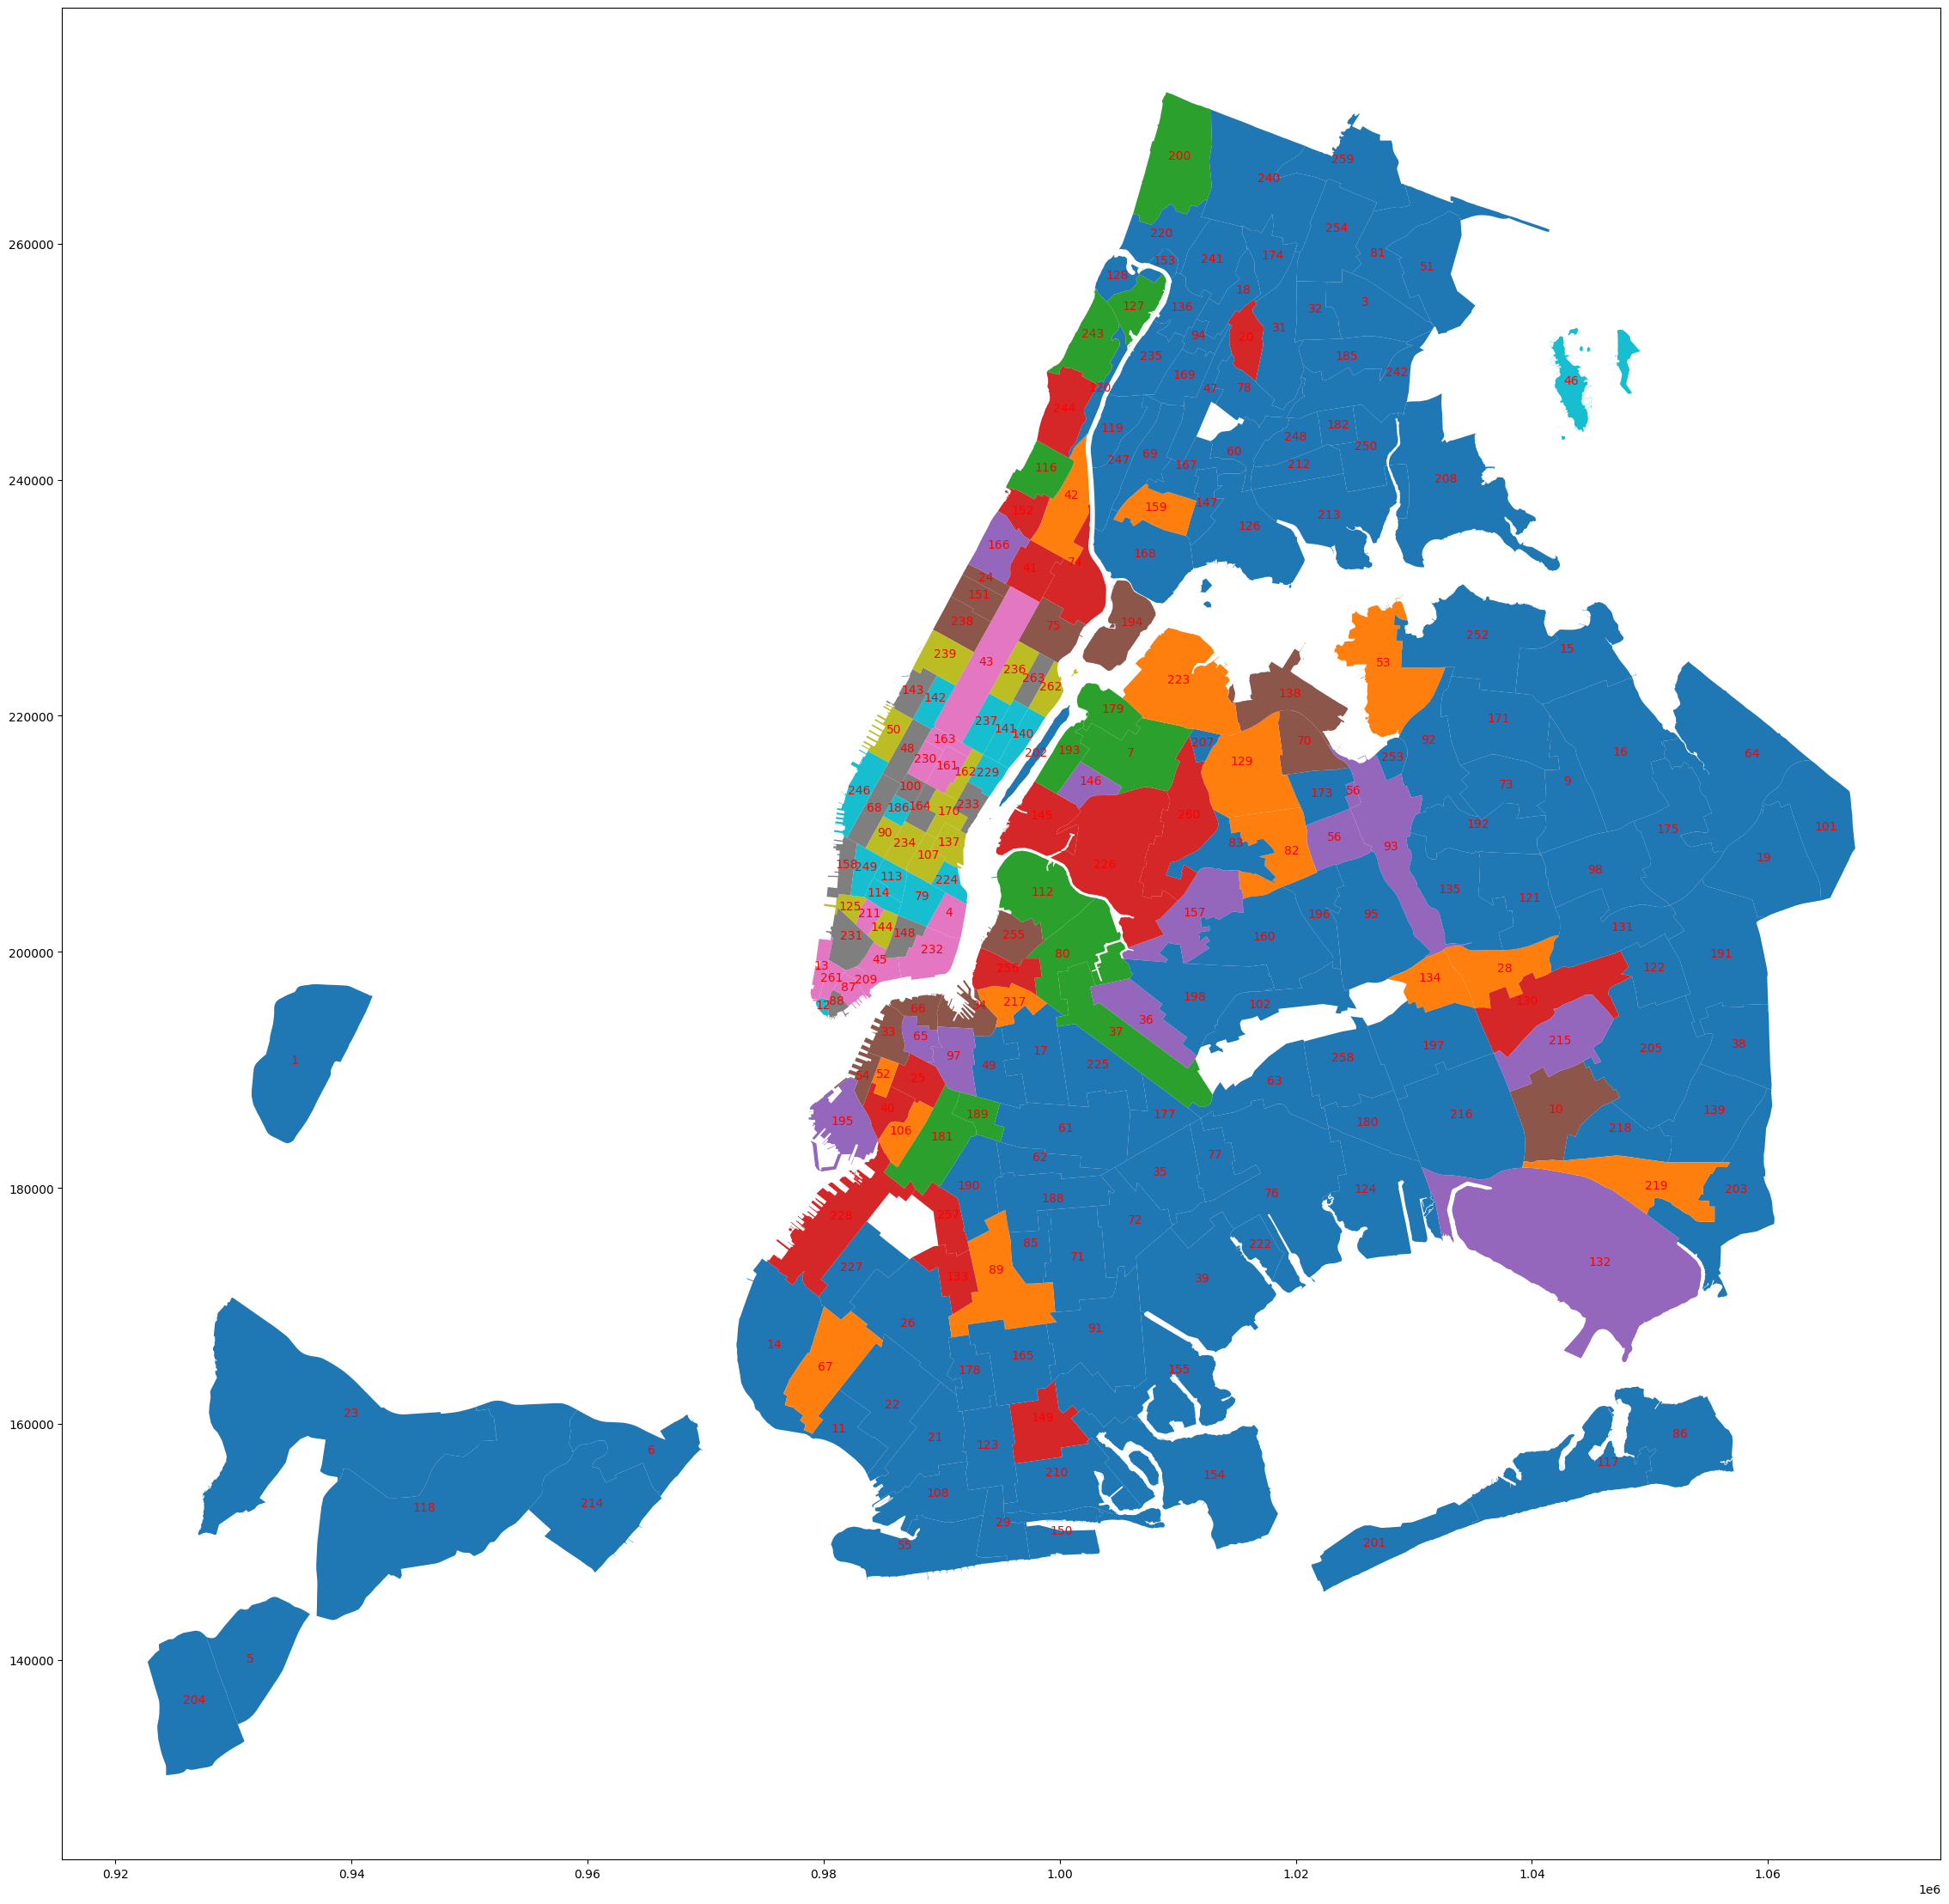

In [1143]:
zones['cordinates'] = zones['geometry'].apply(lambda x: x.representative_point().coords[:])
zones['cordinates']  = [coords[0] for coords in zones['cordinates']]
fig, ax = plt.subplots(1, 1, figsize = (30,28))
# Plot the map and display it
zones.plot(column = 'congestion_surcharge',
ax = ax)
#legend = True)
#legend_kwds = {'label': "passenger_count", 'orientation': "vertical"})

for idx, row in zones.iterrows():
   plt.annotate(text=row['LocationID'], xy=row['cordinates'], horizontalalignment='center', color='red')

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Consider moving taxis from low pick drop ratio zone to high ratio to meet demands.
2. Increase no. of taxi during late night hours on weekends as trends suggest higher no. of trips in weekend during night hours.
3. Consider having taxis nearby to high demand routes during morning hours and evening hours.
  


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. We have observed that the demand is significantly higher in May and October, consider having more taxis deployed during this time to cater the demand.
2. Trends shows demand is usulaly high on Thursdays consider deploying more taxis on high demand dones during busy hours(3PM-7PM).
3. Consider having more cabs in top 10 zones during rush hours

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Adjust surcharge fees to be applied during busy/slowest traffic hours to compensate drivers on lost time in traffic
2. Creative mobile technologies vendor should consider raising the price as no_of_trips is lower.
3. Adjustment of fare should be done dynamically instead of running a flat rate.
4. Zone based pricing can be implemented, zones with high demand can be slight higher than zones with lower demand.
5. Implement dynamic price surge in high demand and busy routes

